In [1095]:
%matplotlib inline

import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib import cm
from matplotlib.text import TextPath
from scipy import interpolate
from pydlv import data_reader, dl_model_3, dl_generator, dl_plotter, trajectory_plotter, data_analyser

mpl.rcParams['figure.dpi'] = 300

def get_choice_patches():
    screen_patch = mpl_patches.Rectangle((-1.1, -0.1), 2.2, 1.3, fill=False, lw=3, 
                                         edgecolor='black')
    left_patch = mpl_patches.Rectangle((-1.05, 0.85), 0.3, 0.3, fill=True, lw=1, 
                                   facecolor='white', edgecolor='black', alpha=0.2)
    right_patch = mpl_patches.Rectangle((0.75, 0.85), 0.3, 0.3, fill=True, lw=1, 
                                   facecolor='white', edgecolor='black', alpha=0.2)
    left_text = mpl_patches.PathPatch(TextPath((-1.0, 0.9), 'A', size=0.3, 
                                               backgroundcolor='white'))
    right_text = mpl_patches.PathPatch(TextPath((0.8, 0.9), 'B', size=0.3))
    
    return screen_patch, left_patch, right_patch, left_text, right_text

In [495]:

import os
from pydlv import data_reader, derivative_calculator

dr = data_reader.DataReader()
dc = derivative_calculator.DerivativeCalculator()

model = dl_model_3.DLModel3()
dlg = dl_generator.DLGenerator(model)

da = data_analyser.DataAnalyser()

In [496]:
data = dr.read_data(path='/Users/h/Downloads/data/')

# load expect data - format it in the right way

## trajectory

In [1227]:
sublist = [2,3,4,5,6,7,8,9,10] 
main_dir = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/trajectory'

for ind,sub in enumerate(sublist):
    flat_list = [];    fix_file_list = [];     files = []
    files =  glob.glob(os.path.join(main_dir,'sub-{:04d}'.format(sub),'ses-*','*_task*-pain_expect_trajectory_combined.csv'))
    fix_file_list.append(files)
    flat_list = [item for sub_list in fix_file_list for item in sub_list]
#     print(flat_list)
    p_traj = pd.DataFrame()
    for file in flat_list:
#         print(file)
        
        df = pd.DataFrame()
        df = pd.read_csv(file)
        
        if p_traj.empty:
            df['trial_no'] = df['trial_number']
#             print(df['trial_number'])
        else:
            unique = p_traj['trial_no'].unique()
#             print(unique)
            new_number = len(unique) # 12
            df['trial_no'] = df['trial_number'] + new_number
            
        p_traj = pd.concat([p_traj, df], axis = 0, sort = True)
    p_traj.to_csv(os.path.join(main_dir, 'sub-{:04d}'.format(sub), 
           'sub-{:04d}'.format(sub) + '_pain_expect_trajectory_total-session.csv'), index=False)
    
    

In [1258]:
sublist = [2,3,4,5,6,7,8,9,10] 
main_dir = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/trajectory'
p_traj = pd.DataFrame(); #p_result = pd.DataFrame()
flat_list = [];    fix_file_list = [];     files = []
for ind,sub in enumerate(sublist):
    files =  glob.glob(os.path.join(main_dir, 'sub-{:04d}'.format(sub), 
             'sub-{:04d}'.format(sub) + '_pain_expect_trajectory_total-session.csv'))
    fix_file_list.append(files)
flat_list = [item for sub_list in fix_file_list for item in sub_list]
for file in flat_list:
    df = pd.DataFrame()
    df = pd.read_csv(file)
    p_traj = pd.concat([p_traj, df], axis = 0, sort = True)
 

pt = p_traj.rename(columns={"src_subject_id":"subj_id",
                             #"trial_number": "trial_no",
                             "time": "t",
                             "x_coord":"x",
                             "y_coord":"y"})


In [1259]:
pt.set_index(['subj_id','trial_no'], inplace=True, drop=True)

In [1260]:
pt.head()

session_id   t  trial_number    x  x_coord_origin    y  \
subj_id trial_no                                                           
2       1                  4   0             1  960               0  707   
        1                  4  10             1  960               0  707   
        1                  4  20             1  960               0  707   
        1                  4  30             1  960               0  707   
        1                  4  40             1  960               0  707   

                  y_coord_origin  
subj_id trial_no                  
2       1                      0  
        1                      0  
        1                      0  
        1                      0  
        1                      0

## behavioral data

In [1240]:
sublist = [2,3,4,5,6,7,8,9,10] 
main_dir = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/beh_raw'

for ind,sub in enumerate(sublist):
    flat_list = [];    fix_file_list = [];     files = []
    files =  glob.glob(os.path.join(main_dir,'sub-{:04d}'.format(sub),'ses-*','*_task*-pain_beh.csv'))
    fix_file_list.append(files)
    flat_list = [item for sub_list in fix_file_list for item in sub_list]
    p_result = pd.DataFrame()
    for file in flat_list:
        df = pd.DataFrame()
        df = pd.read_csv(file)
        
        if p_result.empty:
            df['trial_no'] = df.index + 1
        else:
            unique = p_result['trial_no'].unique()
            new_number = len(unique) # 12
            df['trial_no'] = df.index + new_number + 1
            
        p_result = pd.concat([p_result, df], axis = 0, sort = True)
    p_result.to_csv(os.path.join(main_dir, 'sub-{:04d}'.format(sub), 'sub-{:04d}'.format(sub) + '_pain_beh_total-session.csv'), index = False)
    
    

In [1242]:
p_result.head()

,ISI01_biopac,ISI01_duration,ISI01_onset,ISI02_biopac,ISI02_duration,ISI02_onset,ISI03_biopac,ISI03_duration,ISI03_onset,ITI_biopac,...,param_end_instruct_onset,param_experiment_duration,param_run_num,param_start_biopac,param_stimulus_type,param_task_name,param_trigger_onset,session_id,src_subject_id,trial_no
0,1.616614e+09,0.693348,1.616614e+09,1.616614e+09,0.558250,1.616614e+09,1.616614e+09,5.688015,1.616614e+09,1.616614e+09,...,1.616615e+09,398.510163,-1,1.616614e+09,low_stim,pain,1.616614e+09,4,10,1
1,1.616614e+09,1.983536,1.616614e+09,1.616614e+09,0.564628,1.616614e+09,1.616614e+09,6.494392,1.616614e+09,1.616614e+09,...,1.616615e+09,398.510163,-1,1.616614e+09,med_stim,pain,1.616614e+09,4,10,2
2,1.616614e+09,1.988423,1.616614e+09,1.616614e+09,4.869513,1.616614e+09,1.616614e+09,2.780997,1.616614e+09,1.616614e+09,...,1.616615e+09,398.510163,-1,1.616614e+09,med_stim,pain,1.616614e+09,4,10,3
3,1.616614e+09,0.891368,1.616614e+09,1.616614e+09,3.372866,1.616614e+09,1.616614e+09,3.184912,1.616614e+09,1.616614e+09,...,1.616615e+09,398.510163,-1,1.616614e+09,high_stim,pain,1.616614e+09,4,10,4
4,1.616614e+09,0.694571,1.616614e+09,1.616614e+09,2.459471,1.616614e+09,1.616614e+09,4.188530,1.616614e+09,1.616614e+09,...,1.616615e+09,398.510163,-1,1.616614e+09,med_stim,pain,1.616614e+09,4,10,5


In [1244]:
sublist = [2,3,4,5,6,7,8,9,10] 
main_dir = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/beh_raw'
p_total = pd.DataFrame(); p_result = pd.DataFrame()
flat_list = [];    fix_file_list = [];     files = []
for ind,sub in enumerate(sublist):
    files =  glob.glob(os.path.join(main_dir, 'sub-{:04d}'.format(sub), 'sub-{:04d}'.format(sub) + '_pain_beh_total-session.csv'))
    fix_file_list.append(files)
flat_list = [item for sub_list in fix_file_list for item in sub_list]
for file in flat_list:
    df = pd.DataFrame()
    df = pd.read_csv(file)
    p_total = pd.concat([p_total, df], axis = 0, sort = True)
    
p_total['expect_RT'] = p_total['event02_expect_responseonset'] - p_total['event02_expect_displayonset']
p_total_sub =  p_total[["src_subject_id","trial_no","session_id",
                          "param_cue_type","param_stimulus_type", "event02_expect_angle", "expect_RT"]]

In [1254]:
p_result = p_total_sub.rename(columns={"src_subject_id":"subj_id"}) #, "trial_number":"trial_no"})

In [1255]:
p_result.set_index(['subj_id' ,'trial_no'], inplace=True, drop=True)

In [1261]:
p_result.head()

session_id param_cue_type param_stimulus_type  \
subj_id trial_no                                                  
2       1                  4        low_cue           high_stim   
        2                  4       high_cue            med_stim   
        3                  4        low_cue            low_stim   
        4                  4        low_cue            low_stim   
        5                  4       high_cue            low_stim   

                  event02_expect_angle  expect_RT  
subj_id trial_no                                   
2       1                    42.854476    1.78984  
        2                   120.570248    1.79070  
        3                    84.999355    3.26809  
        4                    36.315886    3.46876  
        5                   129.127372    3.62063

## merge data

In [1262]:

data = pd.merge(pt, p_result, left_index=True, right_index=True)
        

In [1263]:
data.head()

session_id_x   t  trial_number    x  x_coord_origin    y  \
subj_id trial_no                                                             
2       1                    4   0             1  960               0  707   
        1                    4  10             1  960               0  707   
        1                    4  20             1  960               0  707   
        1                    4  30             1  960               0  707   
        1                    4  40             1  960               0  707   

                  y_coord_origin  session_id_y param_cue_type  \
subj_id trial_no                                                
2       1                      0             4        low_cue   
        1                      0             4        low_cue   
        1                      0             4        low_cue   
        1                      0             4        low_cue   
        1                      0             4        low_cue   

                 param_stimulus_type  event02_expect_angle  expect_RT  
subj_id trial_no                                                       
2       1                  high_stim             42.854476    1.78984  
        1                  high_stim             42.854476    1.78984  
        1                  high_stim             42.854476    1.78984  
        1                  high_stim             42.854476    1.78984  
        1                  high_stim             42.854476    1.78984

need to drop a level


In [1264]:
a = (707-data.y)/250

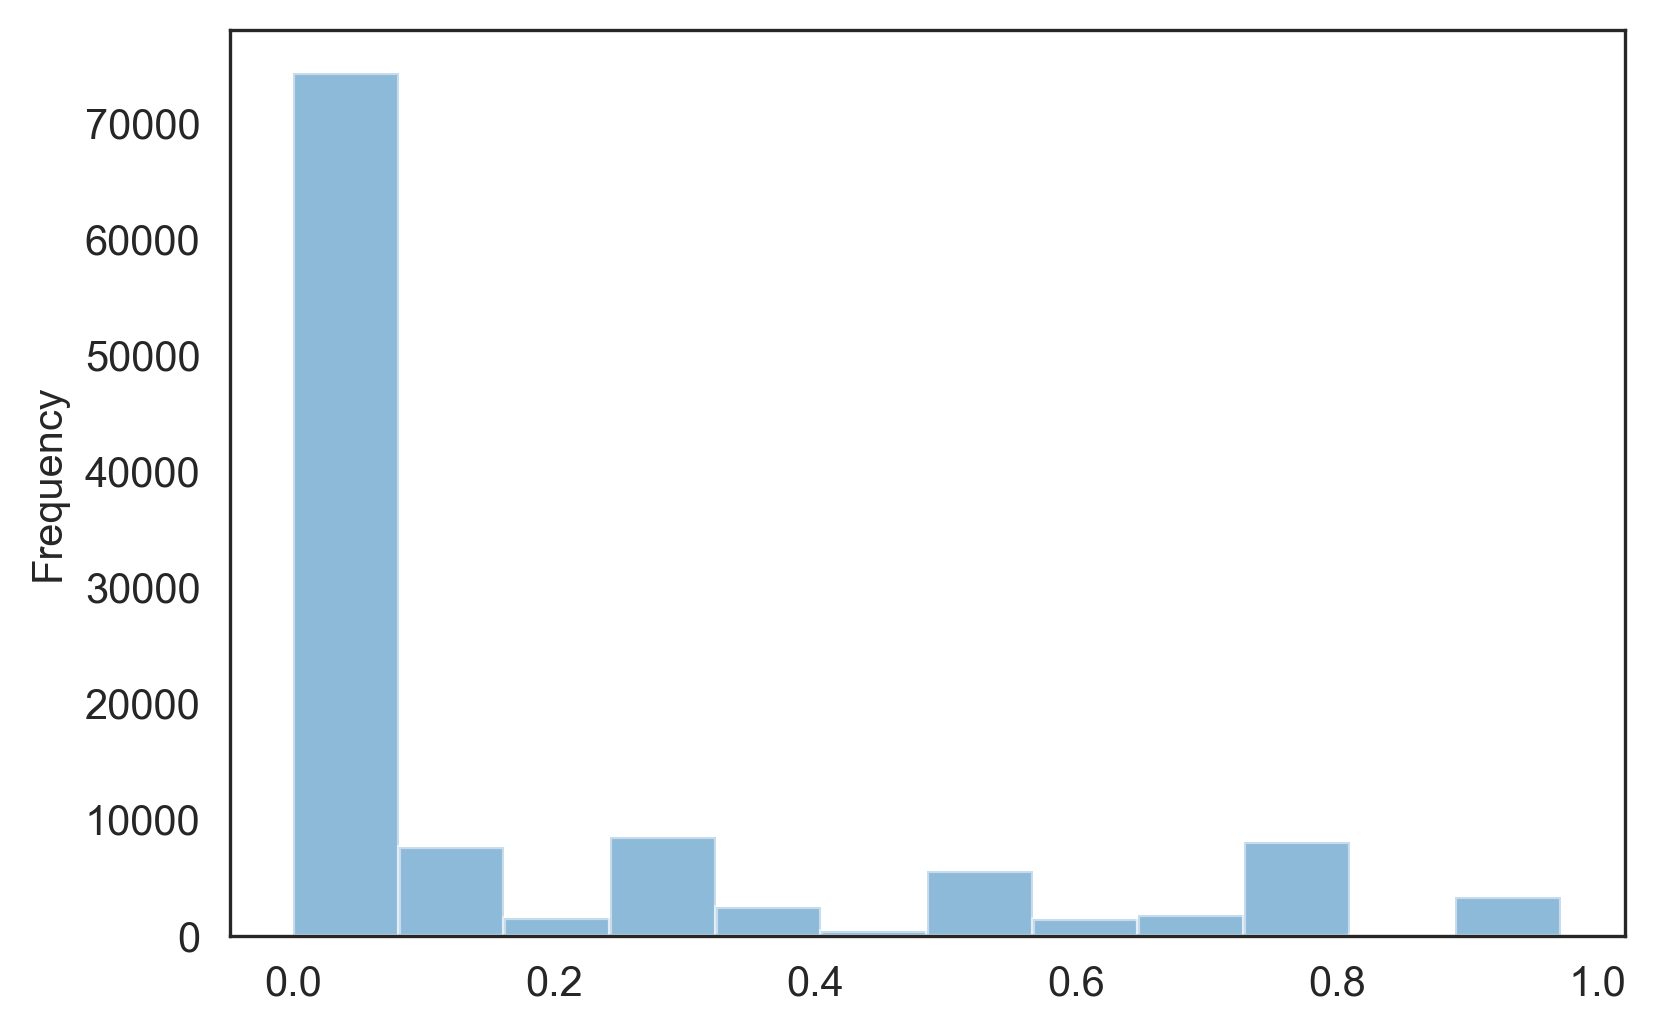

In [1265]:
a.plot.hist(bins=12, alpha=0.5)

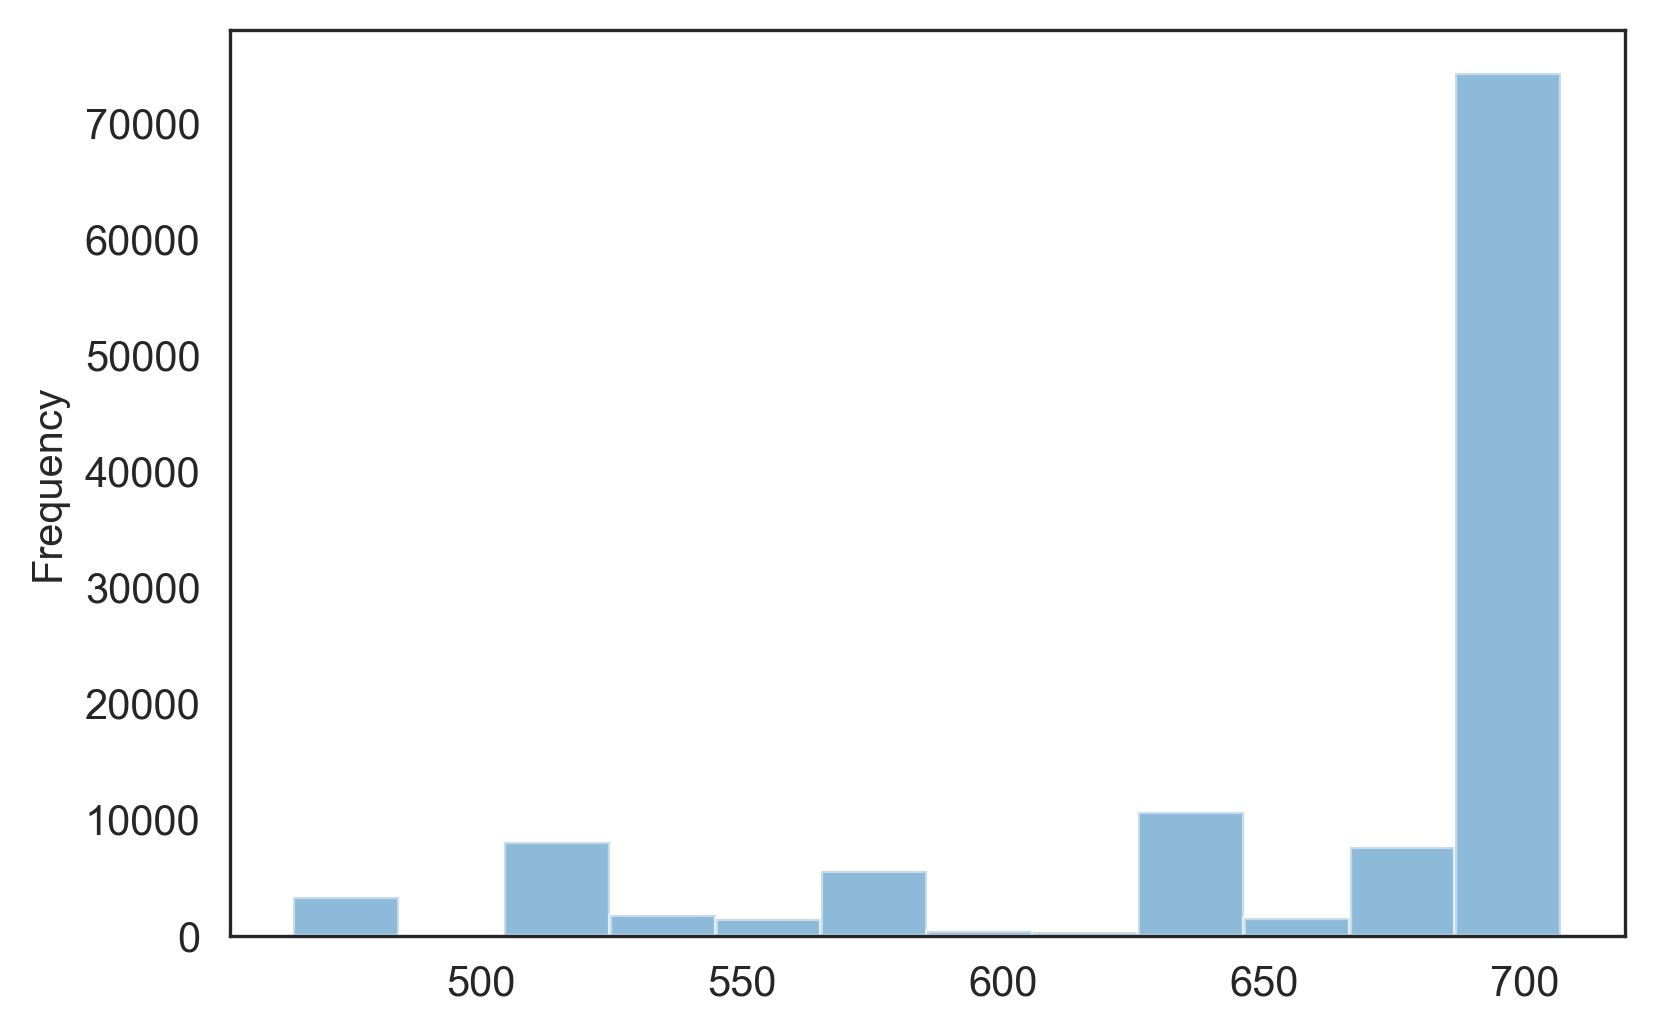

In [1266]:
data.y.plot.hist(bins=12, alpha=0.5)

## preprocess data

In [1279]:
try_df = data.reset_index()
reorder_column = ['subj_id','trial_no','t','x','y'] #,'session_id']
df = try_df[['subj_id','trial_no','t','x','y']] #,'session_id'], axis=1)
add_df = try_df[try_df.columns.difference(reorder_column)]

sort_df = pd.merge(df, add_df, left_index=True, right_index=True)
        

In [1280]:
df.head()

,subj_id,trial_no,t,x,y
0,2,1,0,960,707
1,2,1,10,960,707
2,2,1,20,960,707
3,2,1,30,960,707
4,2,1,40,960,707


In [1281]:
add_df.head()

,event02_expect_angle,expect_RT,param_cue_type,param_stimulus_type,session_id_x,session_id_y,trial_number,x_coord_origin,y_coord_origin
0,42.854476,1.78984,low_cue,high_stim,4,4,1,0,0
1,42.854476,1.78984,low_cue,high_stim,4,4,1,0,0
2,42.854476,1.78984,low_cue,high_stim,4,4,1,0,0
3,42.854476,1.78984,low_cue,high_stim,4,4,1,0,0
4,42.854476,1.78984,low_cue,high_stim,4,4,1,0,0


In [1282]:
sort_df.head()

,subj_id,trial_no,t,x,y,event02_expect_angle,expect_RT,param_cue_type,param_stimulus_type,session_id_x,session_id_y,trial_number,x_coord_origin,y_coord_origin
0,2,1,0,960,707,42.854476,1.78984,low_cue,high_stim,4,4,1,0,0
1,2,1,10,960,707,42.854476,1.78984,low_cue,high_stim,4,4,1,0,0
2,2,1,20,960,707,42.854476,1.78984,low_cue,high_stim,4,4,1,0,0
3,2,1,30,960,707,42.854476,1.78984,low_cue,high_stim,4,4,1,0,0
4,2,1,40,960,707,42.854476,1.78984,low_cue,high_stim,4,4,1,0,0


## reindex after organizing column orders

In [1283]:
sort_df.set_index(['subj_id','trial_no'], inplace=True, drop=True)

In [1284]:
sort_df.head()

t    x    y  event02_expect_angle  expect_RT  \
subj_id trial_no                                                  
2       1          0  960  707             42.854476    1.78984   
        1         10  960  707             42.854476    1.78984   
        1         20  960  707             42.854476    1.78984   
        1         30  960  707             42.854476    1.78984   
        1         40  960  707             42.854476    1.78984   

                 param_cue_type param_stimulus_type  session_id_x  \
subj_id trial_no                                                    
2       1               low_cue           high_stim             4   
        1               low_cue           high_stim             4   
        1               low_cue           high_stim             4   
        1               low_cue           high_stim             4   
        1               low_cue           high_stim             4   

                  session_id_y  trial_number  x_coord_origin  y_coord_origin  
subj_id trial_no                                                              
2       1                    4             1               0               0  
        1                    4             1               0               0  
        1                    4             1               0               0  
        1                    4             1               0               0  
        1                    4             1               0               0

In [1145]:
# repositioning pandas column
# newdata.insert(0, 't', df.t(1))
# newdata.insert(1, 'x', df.x(1))
# newdata.insert(2, 'y', df.x(2))

# PyDLV

In [1285]:
 class DataReader: 
    def preprocess_data(self, data, exp_type=None, rewards_sum=None):
        # exclude subjects with problematic data
        #data = data.drop([2302, 3217], level='subj_id') 
                
        # Trim the dataset to specific condition (7/5, 10/5, etc.)
        # If needed, trial number can be filtered at this stage as well (e.g., last third of trials)
#         if exp_type !=None:
#             data = data.loc[data['param_cue_type'].isin(exp_type)]
#         if rewards_sum !=None:
#             data = data.loc[data['rewards_sum'].isin(rewards_sum)]
                            
        # Move starting point to 0 and invert y axis, then rescale trajectories to (-1,1) x (0,1)
        startingPoints = data.groupby(level=['subj_id', 'trial_no']).first()
        data.x = data.x - startingPoints.mean(axis = 0).x
        data.y = startingPoints.mean(axis = 0).y - data.y
        data = self.rescale_trajectories(data)
        
        # Remove reaction time: keep only last occurrence of the same x,y for each trial        
        data = data.groupby(level=['subj_id', 'trial_no'], group_keys=False). \
            apply(lambda df: df.drop_duplicates(subset=['x', 'y'], keep='last'))
        
        # Then, we need to delete last point in every trajectory
        data = data.groupby(level=['subj_id', 'trial_no'], group_keys=False). \
            apply(lambda df: df.ix[:-1])
        
        # shift time to the timeframe beginning at 0 for each trajectory
        data.loc[:, 't'] = data.t.groupby(level=['subj_id', 'trial_no']).apply(lambda t: (t-t.min()))

        data['resp_time'] = data['expect_RT']/1000.0
        data['motion_time'] = data.t.groupby(level=['subj_id','trial_no']).max()
        
        # all 'high' options are re-mapped onto the right-hand side of the screen 
#         data = data.groupby(level=['subj_id', 'trial_no']).apply(self.reverse_x)
        # Resample trajectories so that each trajectory has n_steps points
        data = data.groupby(level=['subj_id', 'trial_no']).apply(self.resample_trajectory)
        # ToDo: this is hack, think about how to properly get rid of extra index in resample_trajectory
        data.index = data.index.droplevel(2)
        
        data = data.groupby(level=['subj_id','trial_no']).apply(self.shift_starting_point)
        data = data.groupby(level=['subj_id','trial_no']).apply(self.get_maxd)
        data = data.groupby(level=['subj_id','trial_no']).apply(self.get_chng_mind)
        return data
    
    def reverse_x(self, trajectory):
        # We need to reverse those 'high-low' trajectories which have 'high' option on the left
        # As the data doesn't explicitly specify the location of the presented options, we have to  
        # search for those trials which either 1) have 'high' outcome and the final point is on the 
        # left, or 2) have 'low' outcome and the final point on the right
    
        # Only reverse if trajectory is 'high-low'
        if (trajectory.iloc[0]['rewards_sum'] == trajectory.iloc[0]['exp_type'] + 5):
            is_final_point_positive = trajectory.iloc[-1]['x']>0
            is_outcome_high = trajectory.iloc[-1]['outcome']>trajectory.iloc[-1]['rewards_sum']/2
            if (is_final_point_positive != is_outcome_high):
                trajectory.loc[:,'x'] = -trajectory.loc[:,'x']
        return trajectory
        
    def resample_trajectory(self, trajectory, n_steps = 50):
        # Make the sampling time intervals regular
        t_regular = np.linspace(trajectory.t.min(), trajectory.t.max(), n_steps+1)
        x_interp = np.interp(t_regular, trajectory.t.values, trajectory.x.values)
        y_interp = np.interp(t_regular, trajectory.t.values, trajectory.y.values)
        
        traj_interp = pd.DataFrame([t_regular, x_interp, y_interp]).transpose()
        traj_interp.columns = ['t', 'x', 'y']
        
        # appending extra data from the original trajectory
        for column in trajectory.columns[3:]:
#            print(trajectory[column])
#            print(trajectory[column].iloc[0])
            traj_interp[column] = trajectory[column].iloc[0]
        return traj_interp
        
    def get_chng_mind(self, trajectory, threshold = 0.25):
        is_final_point_positive = trajectory.iloc[-1]['x']>0
        trajectory['chng_mind'] = False
        if is_final_point_positive:
            trajectory['midline_d'] = abs(trajectory.x.min())
            if trajectory.x.min() < -threshold:
                trajectory['chng_mind'] = True        
        else:
            trajectory['midline_d'] = abs(trajectory.x.max())
            if trajectory.x.max() > threshold:
                trajectory['chng_mind'] = True
        return trajectory

    def get_maxd(self, trajectory):
        alpha = np.arctan((trajectory.y.iloc[-1]-trajectory.y.iloc[0])/ \
                            (trajectory.x.iloc[-1]-trajectory.x.iloc[0]))
        d = (trajectory.x.values-trajectory.x.values[0])*np.sin(-alpha) + \
            (trajectory.y.values-trajectory.y.values[0])*np.cos(-alpha)
        trajectory['max_d'] = max(d.min(), d.max(), key=abs)
        return trajectory

    def shift_starting_point(self, trajectory):
        if trajectory.x.iloc[0]*trajectory.x.iloc[-1] < 0:
            trajectory.x -= trajectory.x.iloc[0]
        return trajectory
    def rescale_trajectories(self, trajectories):
        #change frame of reference so that stimuli are located at (-1, 1) and (1, 1)
#         circumference
#         500, 400 
        
        stim_x = 250
        stim_y = 250
        trajectories.loc[:,['t']] /= 1000
        trajectories.loc[:, ['x', 'y']] /= [stim_x, stim_y]
#         trajectories.loc[:,['y']] = trajectories.loc[:,['y']].abs()
        return trajectories

In [1286]:
dr = DataReader()
preproc_df = dr.preprocess_data(sort_df)

/Users/h/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [1287]:
preproc_df.head()

t         x         y  event02_expect_angle  expect_RT  \
subj_id trial_no                                                                
2       2         0.0000  0.000000  0.000000            120.570248     1.7907   
        2         0.0424 -0.024052  0.016104            120.570248     1.7907   
        2         0.0848 -0.024969  0.017937            120.570248     1.7907   
        2         0.1272 -0.025885  0.019771            120.570248     1.7907   
        2         0.1696 -0.026802  0.021604            120.570248     1.7907   

                 param_cue_type param_stimulus_type  session_id_x  \
subj_id trial_no                                                    
2       2              high_cue            med_stim             4   
        2              high_cue            med_stim             4   
        2              high_cue            med_stim             4   
        2              high_cue            med_stim             4   
        2              high_cue            med_stim             4   

                  session_id_y  trial_number  x_coord_origin  y_coord_origin  \
subj_id trial_no                                                               
2       2                    4             2              -1               0   
        2                    4             2              -1               0   
        2                    4             2              -1               0   
        2                    4             2              -1               0   
        2                    4             2              -1               0   

                  resp_time  motion_time     max_d  chng_mind  midline_d  
subj_id trial_no                                                          
2       2          0.001791         2.12  0.033487      False   0.031386  
        2          0.001791         2.12  0.033487      False   0.031386  
        2          0.001791         2.12  0.033487      False   0.031386  
        2          0.001791         2.12  0.033487      False   0.031386  
        2          0.001791         2.12  0.033487      False   0.031386

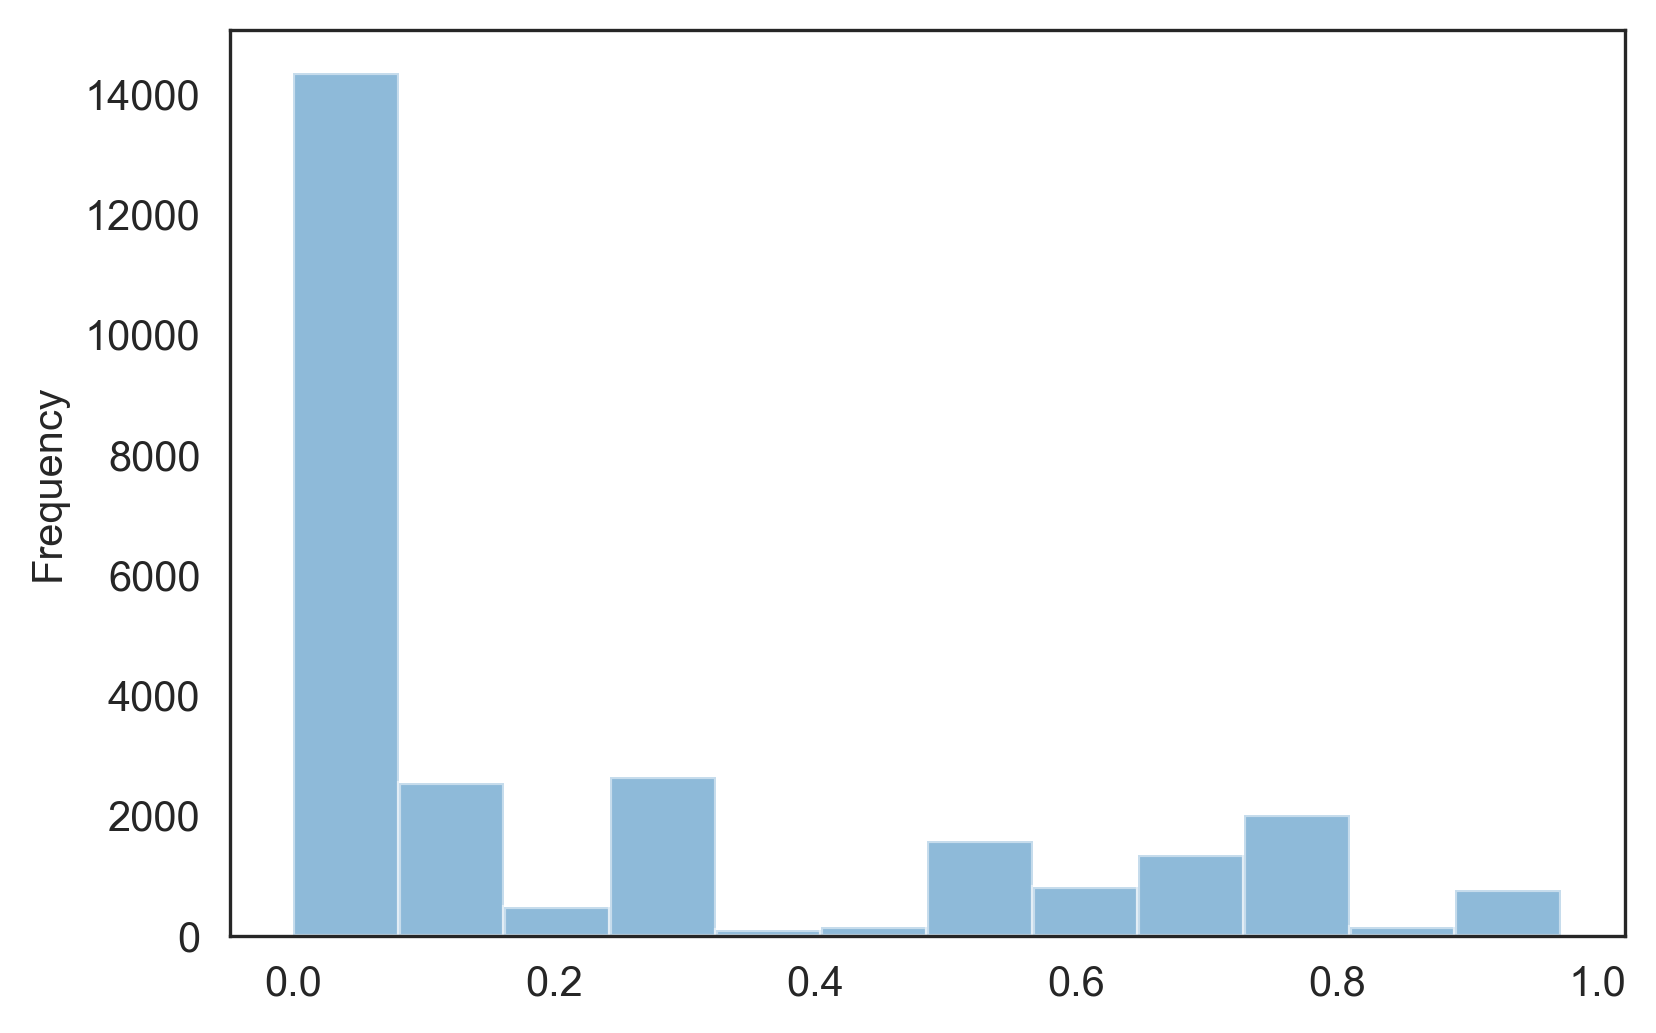

In [1288]:
preproc_df.y.plot.hist(bins=12, alpha=0.5)

## derivatives

In [1289]:
import pandas as pd
import numpy as np

class DerivativeCalculator:  
    def append_derivatives(self, data):
        return data.groupby(level=['subj_id', 'trial_no'], group_keys=False). \
                    apply(self.get_v_and_a)
    
    def get_v_and_a(self, trajectory):
        vx, ax = self.get_derivatives(trajectory.t.values, trajectory.x.values)
        vy, ay = self.get_derivatives(trajectory.t.values, trajectory.y.values)
                
        derivatives = pd.DataFrame(np.asarray([vx, vy, ax, ay]).T, 
                                   columns=['vx', 'vy', 'ax', 'ay'],
                                   index=trajectory.index)
        derivatives['xflip_count'] = self.zero_cross_count(derivatives.vx)
        return pd.concat([trajectory, derivatives], axis=1)
    
    def get_derivatives(self, t, x):
        step = (t[1]-t[0])

        # To be able to reasonably calculate derivatives at the end-points of the trajectories,
        # we append three extra points before and after the actual trajectory, so we get N+6
        # points instead of N       
        x = np.append(x[0]*np.ones(3),np.append(x, x[-1]*np.ones(3)))

        # smooth noise-robust differentiators: http://www.holoborodko.com/pavel/numerical-methods/ \
        # numerical-derivative/smooth-low-noise-differentiators/#noiserobust_2
        v = (-x[:-6] - 4*x[1:-5] - 5*x[2:-4] + 5*x[4:-2] + 4*x[5:-1] + x[6:])/(32*step)
        a = (x[:-6] + 2*x[1:-5] - x[2:-4] - 4*x[3:-3] - x[4:-2] + 2*x[5:-1]+x[6:])\
                /(16*step*step)
        return v, a
        
    def zero_cross_count(self, x):
        return (np.diff(np.sign(x)) != 0).sum() 

In [1290]:
dc = DerivativeCalculator()

deriv_df = dc.append_derivatives(preproc_df) #, 'x_coord_origin', 'y_coord_origin')

In [1291]:
deriv_df.head()

t         x         y  event02_expect_angle  expect_RT  \
subj_id trial_no                                                                
2       2         0.0000  0.000000  0.000000            120.570248     1.7907   
        2         0.0424 -0.024052  0.016104            120.570248     1.7907   
        2         0.0848 -0.024969  0.017937            120.570248     1.7907   
        2         0.1272 -0.025885  0.019771            120.570248     1.7907   
        2         0.1696 -0.026802  0.021604            120.570248     1.7907   

                 param_cue_type param_stimulus_type  session_id_x  \
subj_id trial_no                                                    
2       2              high_cue            med_stim             4   
        2              high_cue            med_stim             4   
        2              high_cue            med_stim             4   
        2              high_cue            med_stim             4   
        2              high_cue            med_stim             4   

                  session_id_y  trial_number  ...  resp_time  motion_time  \
subj_id trial_no                              ...                           
2       2                    4             2  ...   0.001791         2.12   
        2                    4             2  ...   0.001791         2.12   
        2                    4             2  ...   0.001791         2.12   
        2                    4             2  ...   0.001791         2.12   
        2                    4             2  ...   0.001791         2.12   

                     max_d  chng_mind  midline_d        vx        vy  \
subj_id trial_no                                                       
2       2         0.033487      False   0.031386 -0.181323  0.126798   
        2         0.033487      False   0.031386 -0.188080  0.140311   
        2         0.033487      False   0.031386 -0.106202  0.094480   
        2         0.033487      False   0.031386 -0.038673  0.053761   
        2         0.033487      False   0.031386 -0.021622  0.043243   

                            ax            ay  xflip_count  
subj_id trial_no                                           
2       2        -1.799837e+00  1.374684e+00            3  
        2         1.481122e+00 -7.372538e-01            3  
        2         2.381041e+00 -1.424596e+00            3  
        2         8.043042e-01 -4.961129e-01            3  
        2         1.206170e-16 -2.412340e-16            3  

[5 rows x 22 columns]

In [1292]:
deriv_df.to_csv('/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/trajectory/processed_data_sub-02-10.csv')

In [1293]:
dr = data_reader.DataReader()
deriv_df = dr.get_processed_data(path='/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/trajectory/processed_data_sub-02-10.csv')


In [1294]:
deriv_df.reset_index(drop=True, inplace=True)

In [1295]:
deriv_df.head()

,subj_id,trial_no,t,x,y,event02_expect_angle,expect_RT,param_cue_type,param_stimulus_type,session_id_x,...,motion_time,max_d,chng_mind,midline_d,vx,vy,ax,ay,xflip_count,block_no
0,2,2,0.0000,0.000000,0.000000,120.570248,1.7907,high_cue,med_stim,4,...,2.12,0.033487,False,0.031386,-0.181323,0.126798,-1.799837e+00,1.374684e+00,3,1
1,2,2,0.0424,-0.024052,0.016104,120.570248,1.7907,high_cue,med_stim,4,...,2.12,0.033487,False,0.031386,-0.188080,0.140311,1.481122e+00,-7.372538e-01,3,1
2,2,2,0.0848,-0.024969,0.017937,120.570248,1.7907,high_cue,med_stim,4,...,2.12,0.033487,False,0.031386,-0.106202,0.094480,2.381041e+00,-1.424596e+00,3,1
3,2,2,0.1272,-0.025885,0.019771,120.570248,1.7907,high_cue,med_stim,4,...,2.12,0.033487,False,0.031386,-0.038673,0.053761,8.043042e-01,-4.961129e-01,3,1
4,2,2,0.1696,-0.026802,0.021604,120.570248,1.7907,high_cue,med_stim,4,...,2.12,0.033487,False,0.031386,-0.021622,0.043243,1.206170e-16,-2.412340e-16,3,1


### check if there are any negative values in the dataframe

In [1296]:

deriv_df[deriv_df['subj_id']==5].head()

,subj_id,trial_no,t,x,y,event02_expect_angle,expect_RT,param_cue_type,param_stimulus_type,session_id_x,...,motion_time,max_d,chng_mind,midline_d,vx,vy,ax,ay,xflip_count,block_no
4998,5,2,0.0000,0.000000,0.000000,20.042317,2.03731,low_cue,low_stim,4,...,2.12,0.033487,False,0.031386,-0.181323,0.126798,-1.799837e+00,1.374684e+00,3,1
4999,5,2,0.0424,-0.024052,0.016104,20.042317,2.03731,low_cue,low_stim,4,...,2.12,0.033487,False,0.031386,-0.188080,0.140311,1.481122e+00,-7.372538e-01,3,1
5000,5,2,0.0848,-0.024969,0.017937,20.042317,2.03731,low_cue,low_stim,4,...,2.12,0.033487,False,0.031386,-0.106202,0.094480,2.381041e+00,-1.424596e+00,3,1
5001,5,2,0.1272,-0.025885,0.019771,20.042317,2.03731,low_cue,low_stim,4,...,2.12,0.033487,False,0.031386,-0.038673,0.053761,8.043042e-01,-4.961129e-01,3,1
5002,5,2,0.1696,-0.026802,0.021604,20.042317,2.03731,low_cue,low_stim,4,...,2.12,0.033487,False,0.031386,-0.021622,0.043243,1.206170e-16,-2.412340e-16,3,1


## check if there are any y values below zero - all should be from 0 - 1

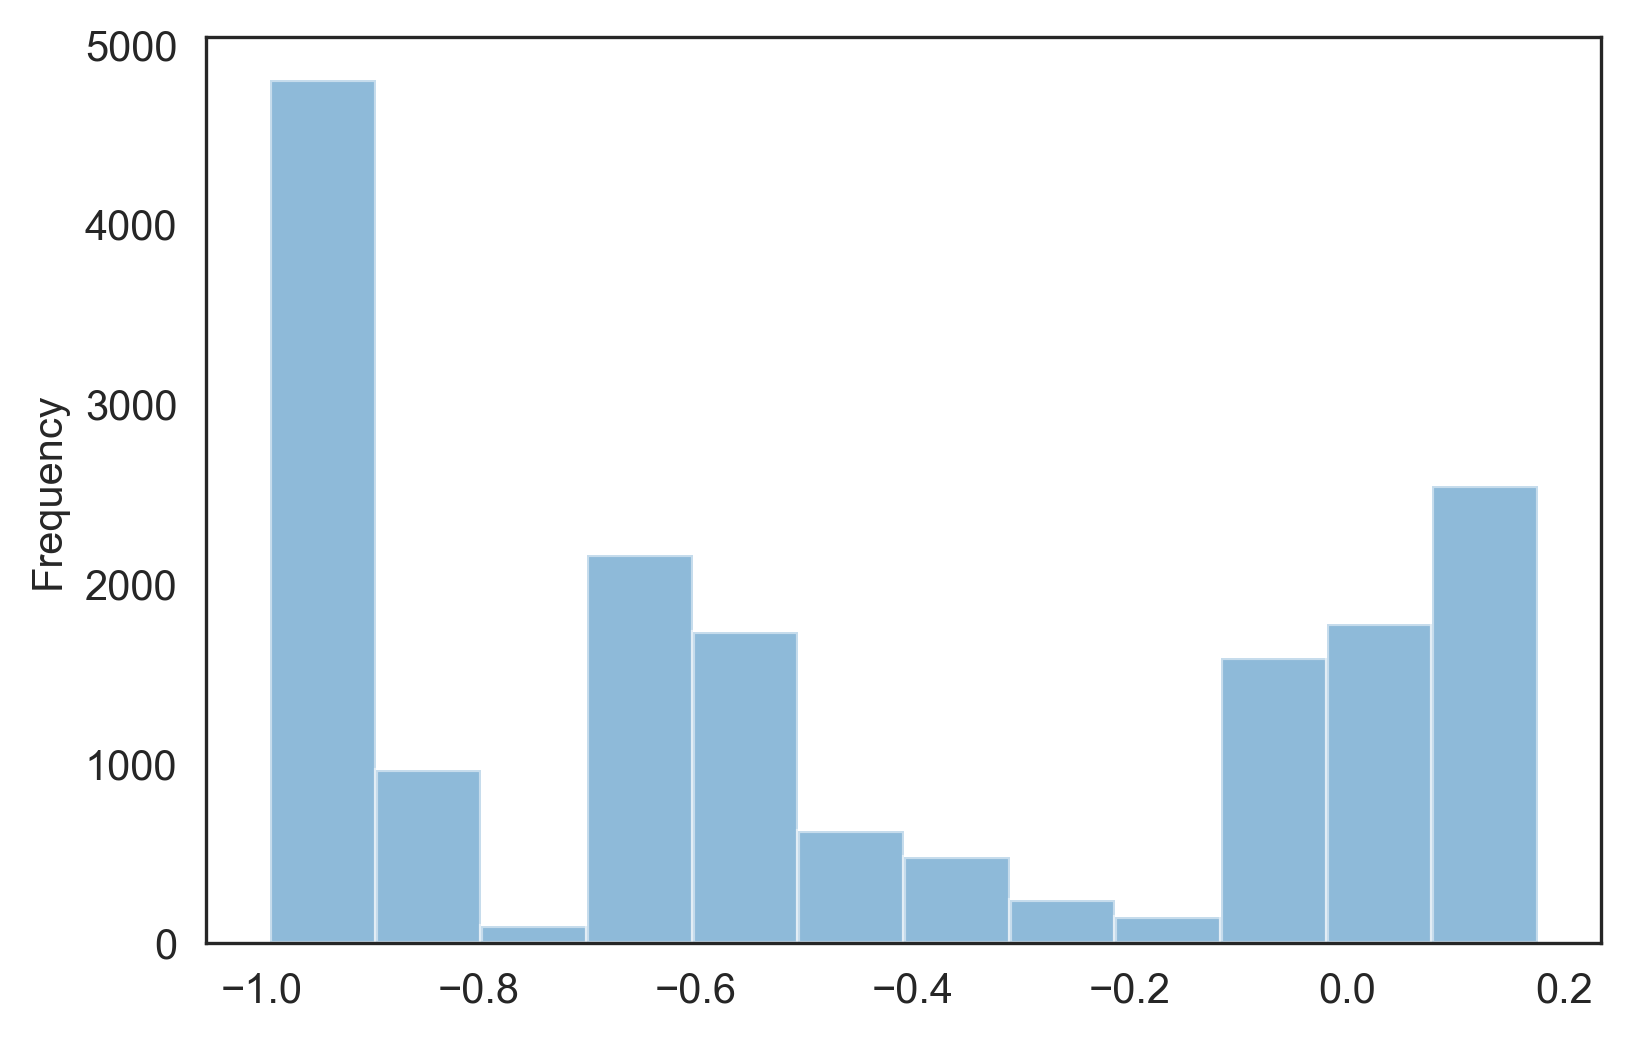

In [1297]:
deriv_df.x.plot.hist(bins=12, alpha=0.5)

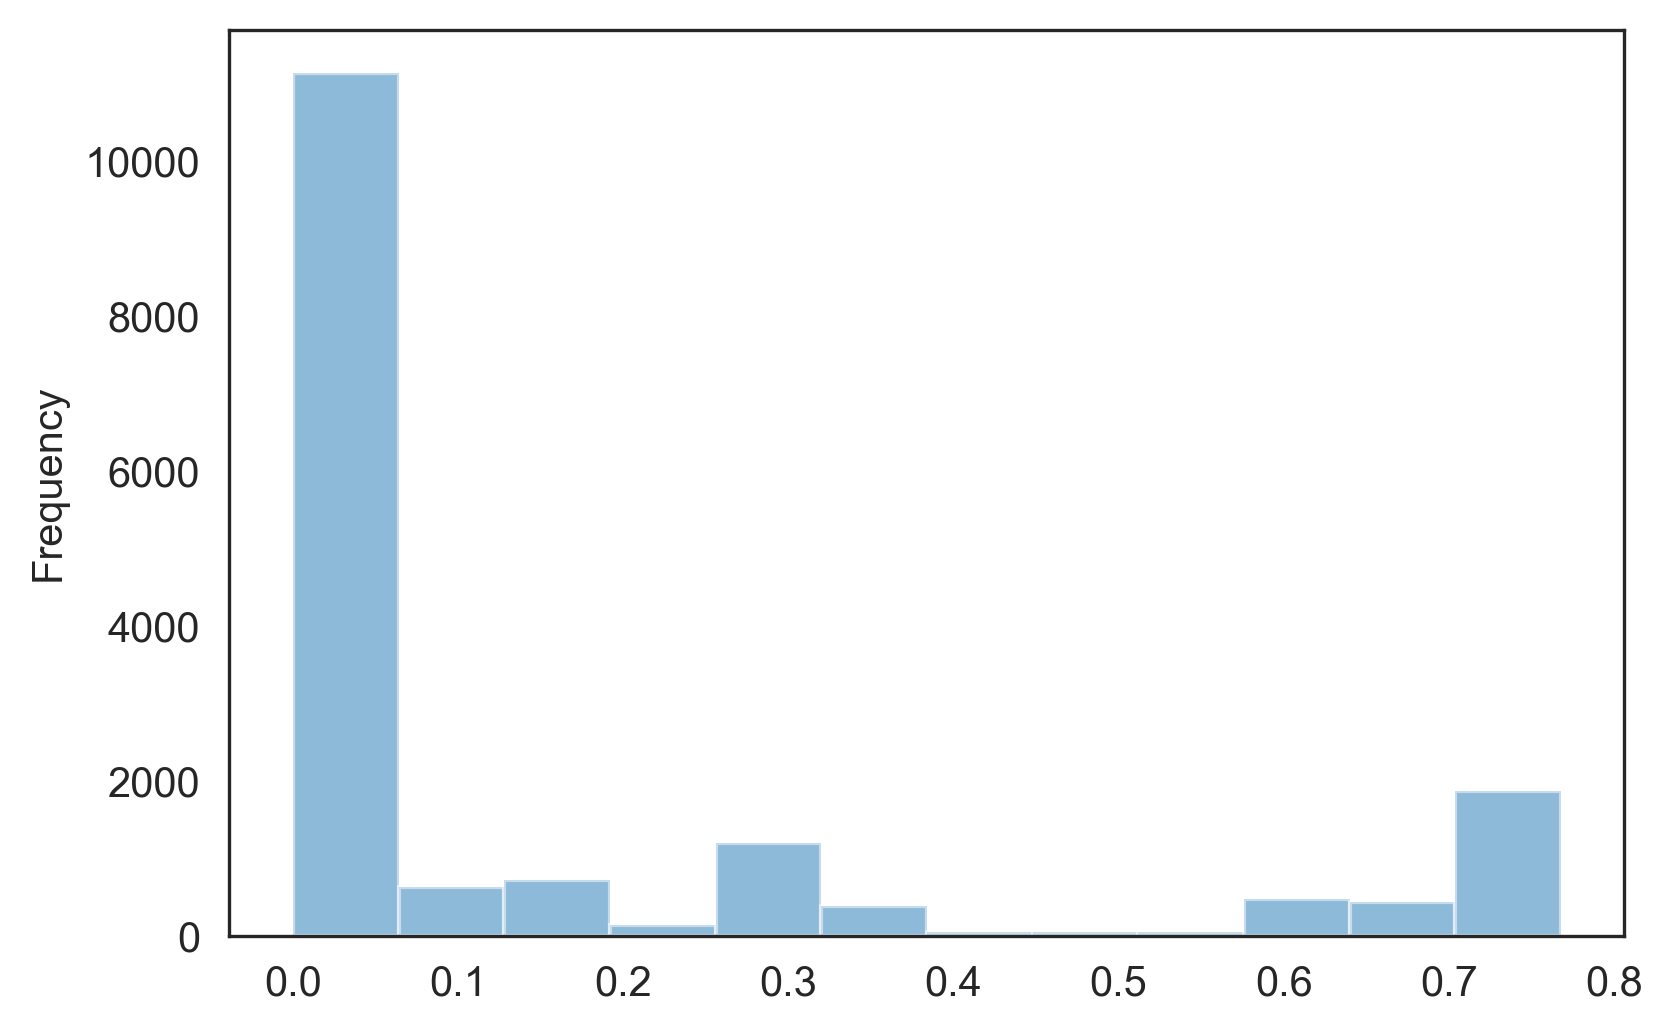

In [1298]:
deriv_df.y.plot.hist(bins=12, alpha=0.5)

In [1299]:
(deriv_df.y < 0).any()

False

# plot

## plot example trajectory

In [1300]:
def plot_sample_trajectory(data, subj_id, trial_no):
    x_lim = [-1.2, 1.2]
    y_lim = [-0.2, 1.2]
#     x_lim = [4, 14]
#     y_lim = [3, 11]
    
    tickLabelFontSize = 20
    axisLabelFontSize = 24

    sns.set_style('white')    
    fig = plt.figure(tight_layout=True)
    ax = fig.add_subplot(111)
    ax.set_xlabel(r'x coordinate', fontsize=axisLabelFontSize)
    ax.set_ylabel(r'y coordinate', fontsize=axisLabelFontSize)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.tick_params(axis='both', which='major', labelsize=tickLabelFontSize)
    
    traj_color = cm.viridis(0.1)

    trajectory = data[(data.subj_id==subj_id) & (data.trial_no==trial_no)]
    ax.plot(trajectory.x, trajectory.y, color=traj_color, ls='none', marker='o', ms=15,
            markerfacecolor='none', markeredgewidth=2, markeredgecolor=traj_color, 
            label='Mouse trajectory')

    # draw screen above the surface and choice options on it
    patches = get_choice_patches()
    for patch in patches:
        ax.add_patch(patch)
        
    ax.set_axis_off()
#     plt.savefig('figures/sample_traj.pdf')
    


/Users/h/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Additional arguments to TextPath used to be ignored, but will trigger a TypeError in 3.3.


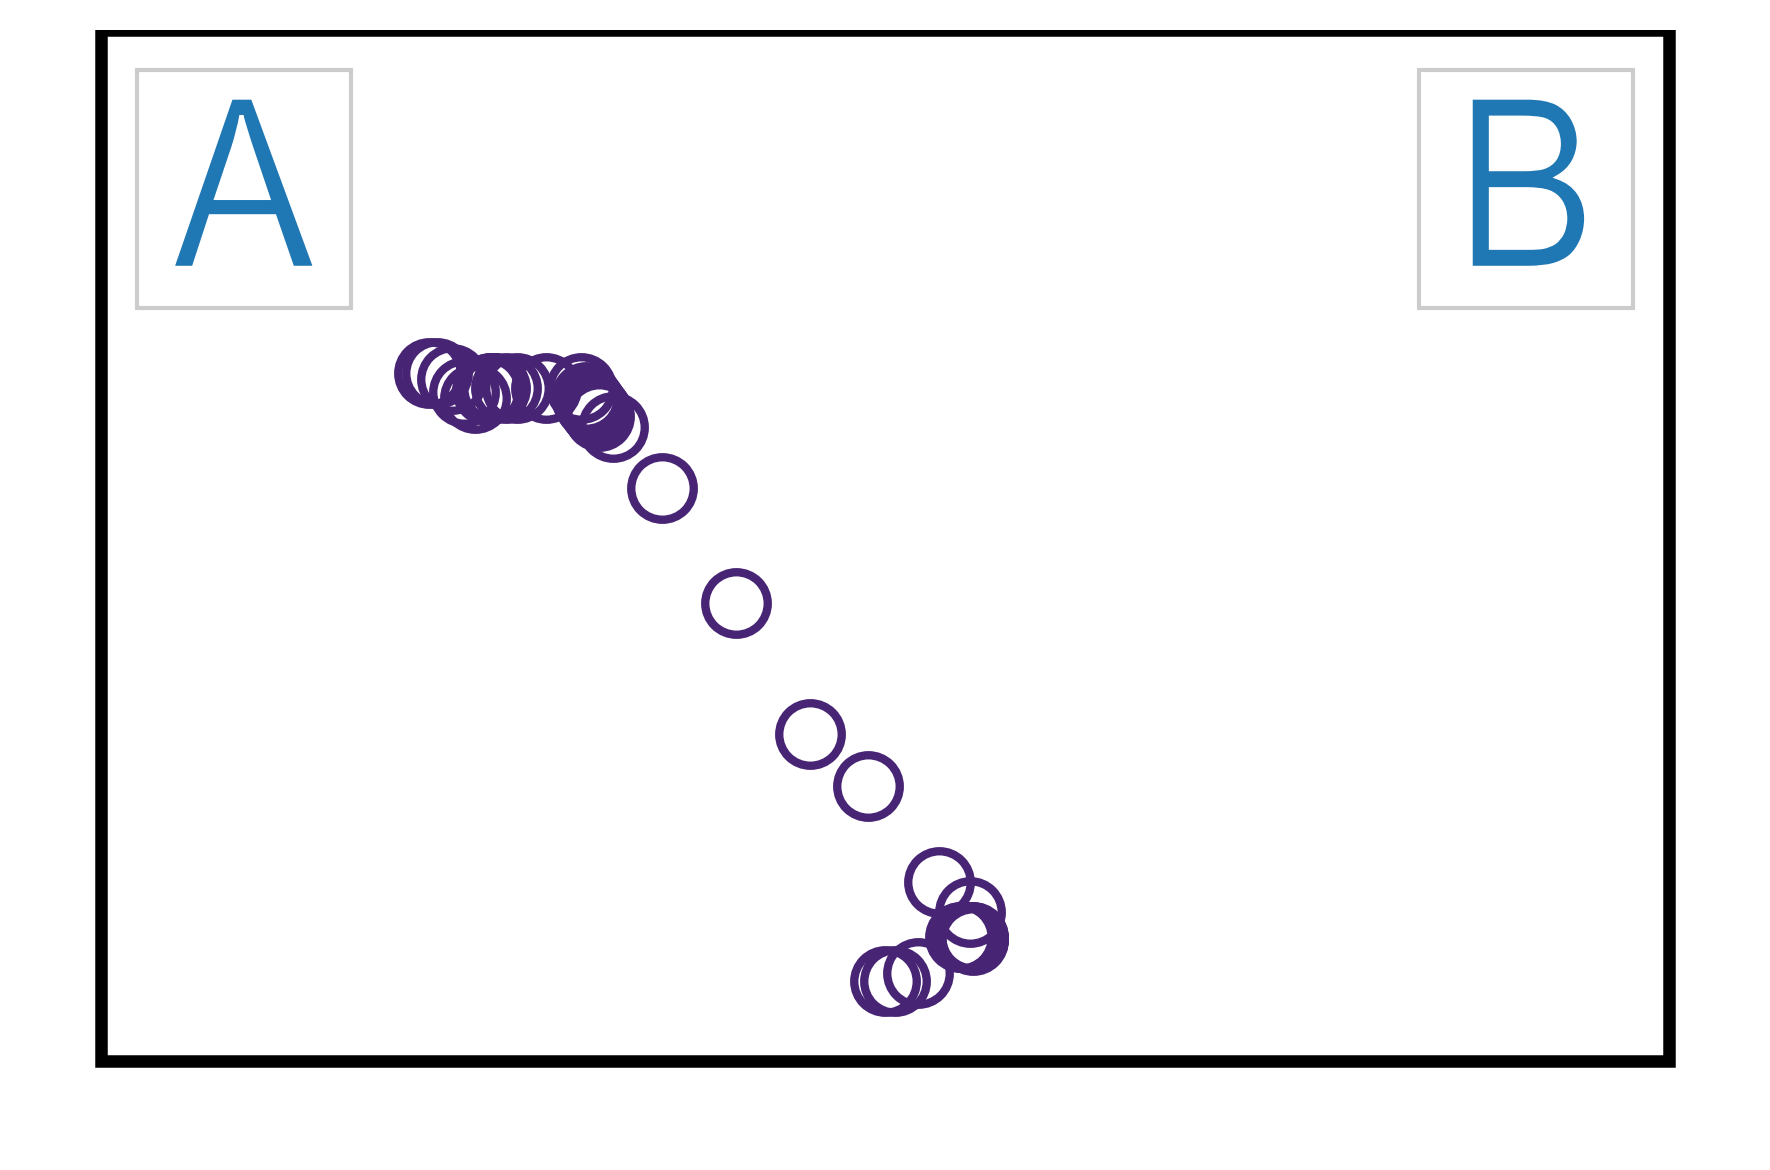

In [1301]:
plot_sample_trajectory(data=deriv_df, subj_id=10, trial_no=11)

## landscape

In [1302]:
def plot_baseline_landscape_overlay(dlg, data, subj_id, trial_no):  
    dlp = dl_plotter.DLPlotter(elev=55, azim=-65)
        
    x_grid, y_grid, dl = dlg.get_model_dl(dlg.model.get_baseline_params()*4)
    x=(x_grid[1:]+x_grid[:-1])/2
    y=(y_grid[1:]+y_grid[:-1])/2
    f = interpolate.interp2d(x,y,dl,kind='cubic')
    
    ax = dlp.plot_surface(x_grid, y_grid, dl, cmap=cm.viridis, alpha=0.9)
    
    ax.set_xticks([-1, -0.5, 0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])
    
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    
    ax.w_zaxis.set_ticklabels([])
    
    sns.set_style('white')
    
    cmap = cm.viridis
    traj_color = cmap(0.1)    
    trajectory = data[(data.subj_id==subj_id) & (data.trial_no==trial_no)]
    z = f(trajectory.x.values, trajectory.y.values)
    if trajectory.x.values[-1]>0:
        z= np.diag(z)
    else:
        z=np.diag(np.fliplr(z))
    
    # plot trajectory on a surface
    ax.plot(trajectory.x.values, trajectory.y.values, z, color='black', alpha=0.5)
    
    # plot marble 
    ax.plot([0.], [0.], [0.], marker='o', markersize=15, color = 'black', alpha=0.7)
    ax.plot([trajectory.x.values[-1]], [trajectory.y.values[-1]], [z[-1]], 
            marker='o', markersize=15, color='black', alpha=0.7)
#    
    # draw screen above the surface and choice options on it
    patches = get_choice_patches()
    for patch in patches:
        ax.add_patch(patch)
        art3d.pathpatch_2d_to_3d(patch, z=0, zdir='z')
        
    # plot trajectory on a screen
    ax.plot(trajectory.x, trajectory.y, zs=0, zdir='z', color=traj_color, ls='none', 
            alpha=1.0, marker='o', ms=15, markerfacecolor='none', markeredgewidth=2, 
            markeredgecolor=traj_color, label='Mouse trajectory')
#     plt.savefig('figures/baseline_dlv.pdf')

/Users/h/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Additional arguments to TextPath used to be ignored, but will trigger a TypeError in 3.3.


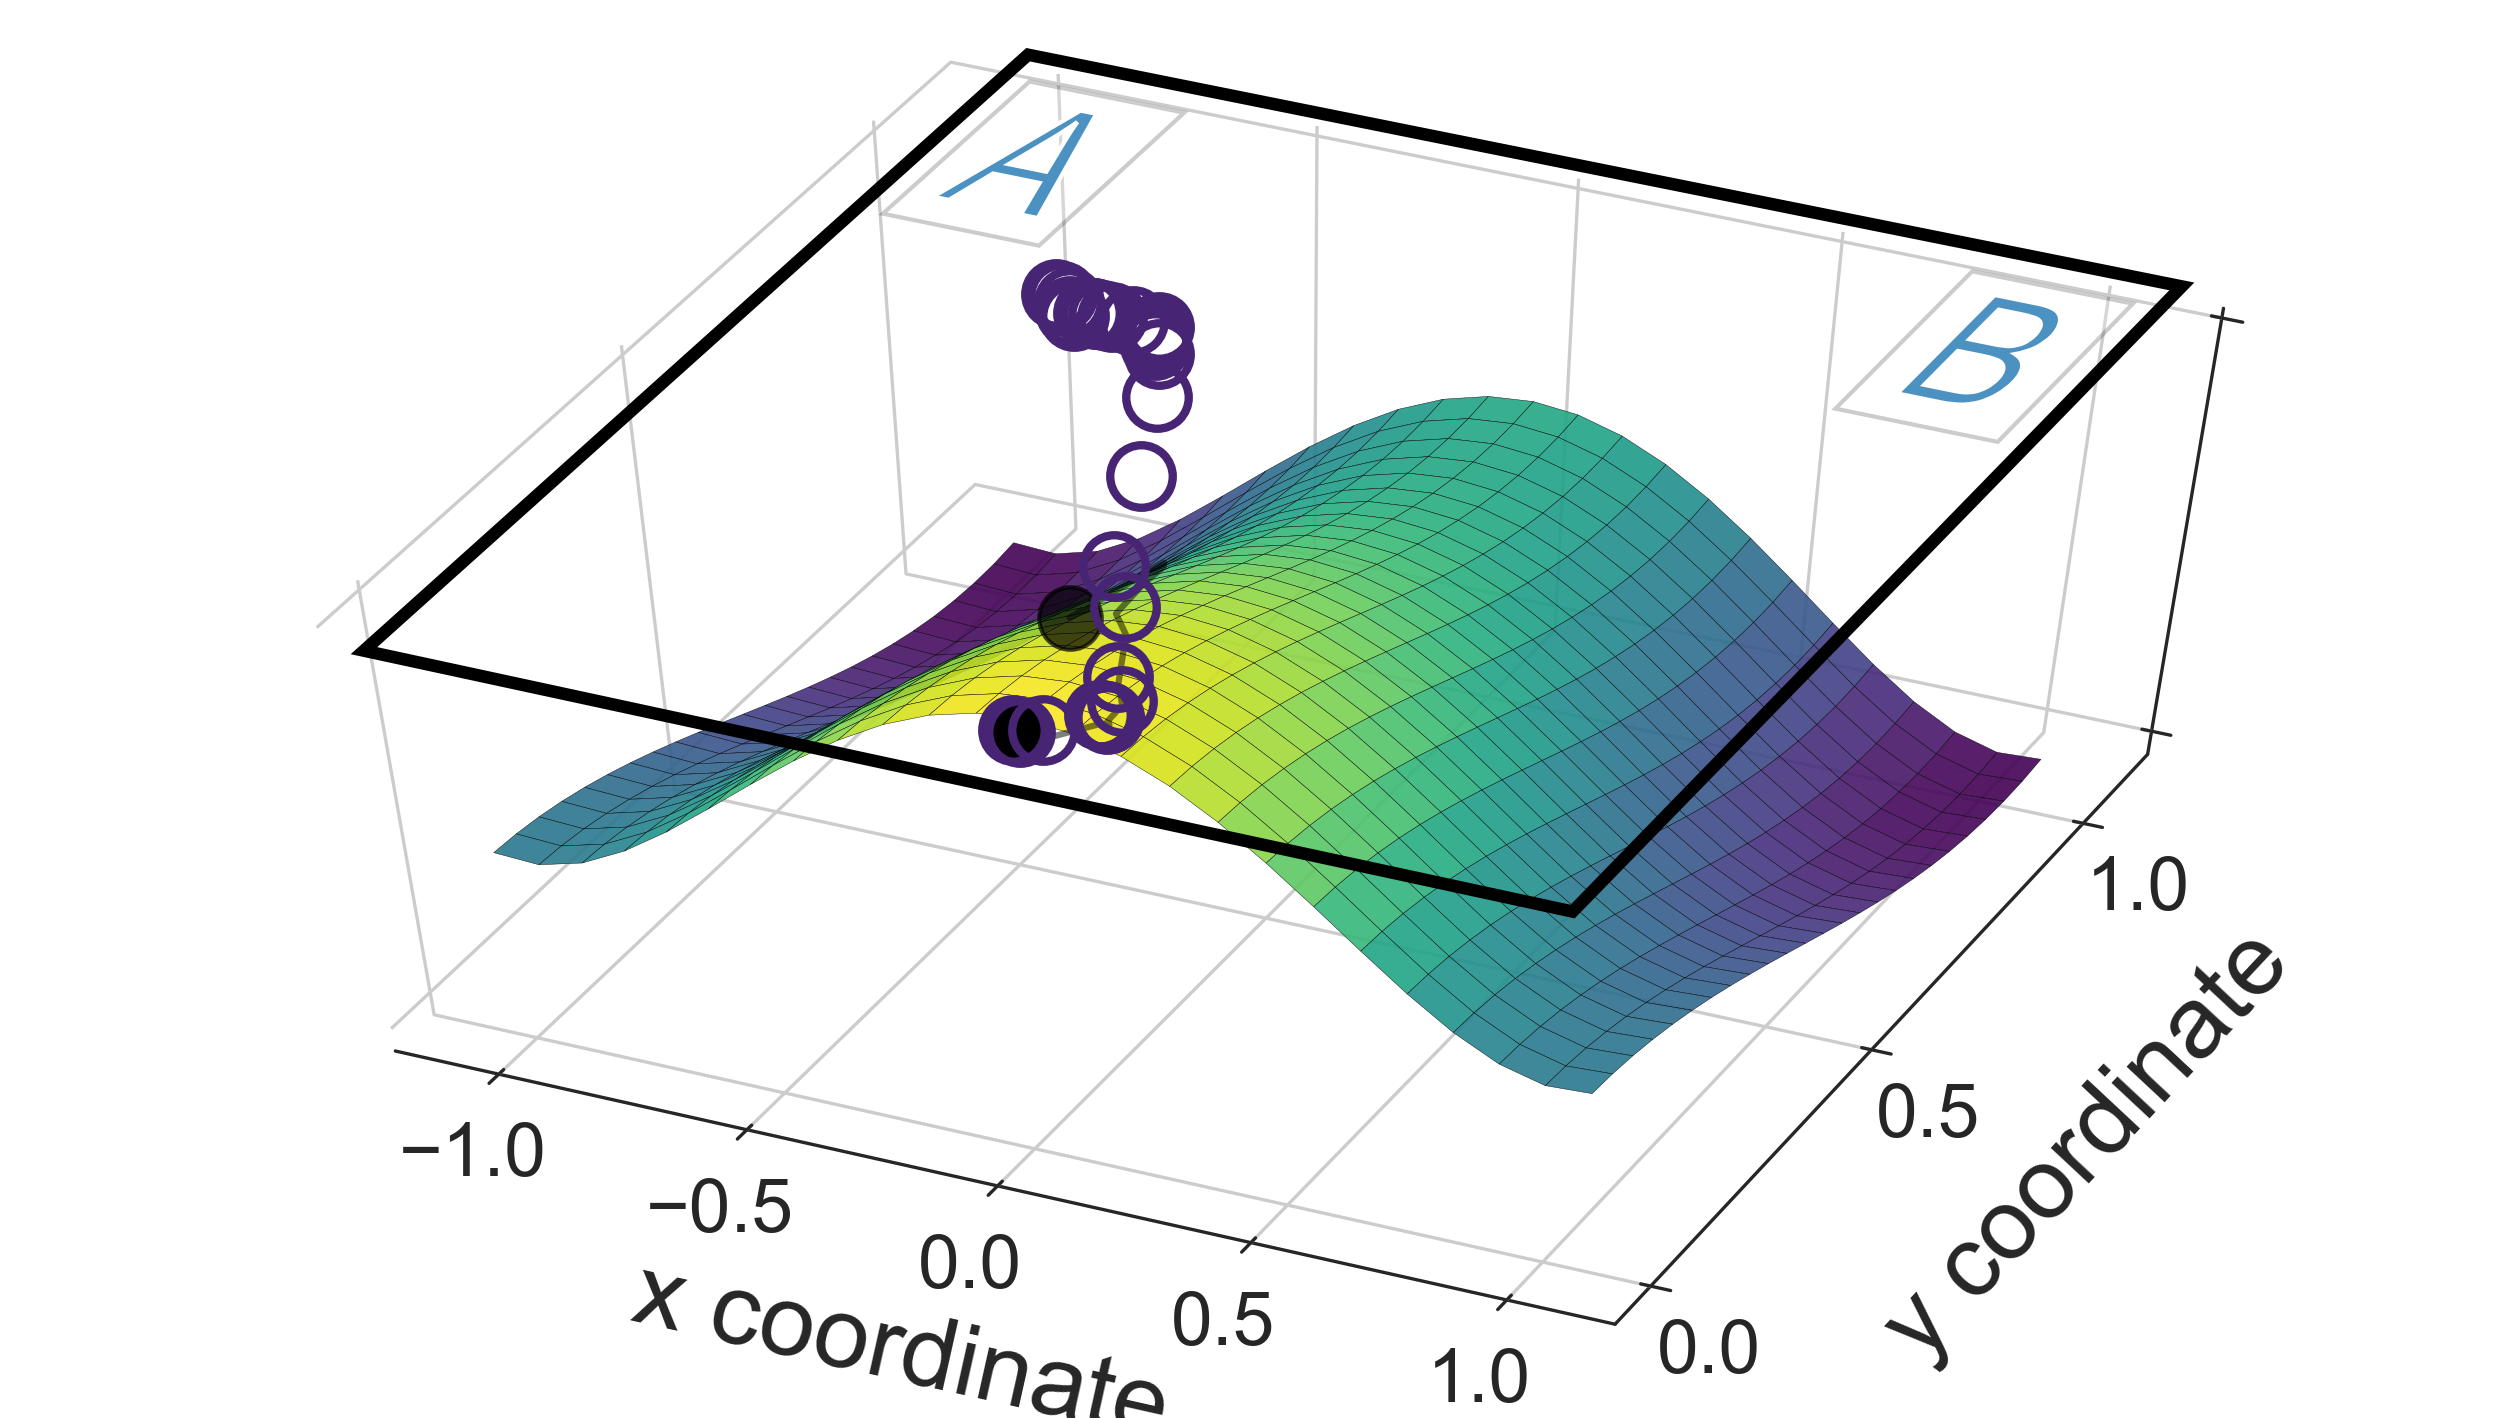

In [1303]:
plot_baseline_landscape_overlay(dlg=dlg, data=deriv_df, 
                                subj_id=10, trial_no=11)
#                                 , x='x_coord_origin', y='y_coord_origin')


## attempt to change to semicircle

In [ ]:

dr = data_reader.DataReader()
data = dr.get_processed_data(path='/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/trajectory/processed_data_sub-02-10.csv')

model = dl_model_3.DLModel3()
dlg = dl_generator.DLGenerator(model)

da = data_analyser.DataAnalyser()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D

class DLPlotter:
    '''
    This class is responsible for plotting decision landscapes. Matplotlib is used as a background.
    '''
    figsize = (10.5, 6) # in inches, at 100 dpi
#    figsize = (14, 8) # in inches, at 100 dpi
    
    legendFontSize = 24
    tickLabelFontSize = 18
    axisLabelFontSize = 24
    lw=2.0
    
    def __init__(self, elev=27, azim=130, ax=None):  
        if ax is None:
            fig = plt.figure(figsize=self.figsize)
            self.ax = fig.add_subplot(111, projection='3d')
#            self.ax = fig.gca(projection='3d')
        else:
            self.ax = ax
        self.set_axis_params(elev, azim)
     
    def set_axis_params(self, elev=27, azim=130):
        self.ax.xaxis.set_major_locator(MaxNLocator(5))
        self.ax.yaxis.set_major_locator(MaxNLocator(5))
        self.ax.zaxis.set_major_locator(MaxNLocator(1))
        self.ax.set_xlabel(r'x coordinate', fontsize=self.axisLabelFontSize, labelpad=20)
        self.ax.set_ylabel(r'y coordinate', fontsize=self.axisLabelFontSize, labelpad=20)
        self.ax.tick_params(axis='both', which='major', labelsize=self.tickLabelFontSize)
        self.ax.view_init(elev, azim) 
        
    def plot_surface(self, x_grid, y_grid, z, cmap=cm.viridis, color=None, scale_z=True, 
                     view=None, alpha=1.0, shade=False, linewidth=0.1, aa=True, plot_marble=True):
        n_cells=100
        x, y = np.meshgrid((x_grid[1:]+x_grid[:-1])/2, (y_grid[1:]+y_grid[:-1])/2)
        z = np.nan_to_num(z)
        if scale_z:
            self.ax.set_zlim([np.min(z), 0])
        norm = mpl.colors.Normalize(vmin=np.min(z), vmax=0, clip=False)
        
        if plot_marble:
            self.ax.plot([0.], [0.], [0.], marker='o', markersize=15, color='black')

        if color is None:
            self.ax.plot_surface(x, y, z, cmap=cmap, norm=norm, alpha=alpha, shade=shade,
                             rcount=n_cells, ccount=n_cells, linewidth=linewidth, edgecolors='k', antialiased=aa)
        else:
            self.ax.plot_surface(x, y, z, color=color, alpha=alpha, shade=shade, rcount=n_cells, 
                                 ccount=n_cells, linewidth=linewidth, edgecolors='k', antialiased=aa)
        if view == 'top right':
            self.ax.view_init(elev=27, azim=40)

        return self.ax
        
    def add_legend(self, colors, labels):
        patches = [mpl.patches.Patch(color=color, linewidth=0) for color in colors]
        self.ax.legend(patches, labels, fontsize=self.legendFontSize)

In [ ]:
def plot_baseline_landscape_overlay(dlg, data, subj_id, trial_no):  
    dlp = dl_plotter.DLPlotter(elev=55, azim=-65)
        
    x_grid, y_grid, dl = dlg.get_model_dl(dlg.model.get_baseline_params()*4)
    x=(x_grid[1:]+x_grid[:-1])/2
    y=(y_grid[1:]+y_grid[:-1])/2
    f = interpolate.interp2d(x,y,dl,kind='cubic')
    
    ax = dlp.plot_surface(x_grid, y_grid, dl, cmap=cm.viridis, alpha=0.9)
    
    ax.set_xticks([-1, -0.5, 0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])
    
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    
    ax.w_zaxis.set_ticklabels([])
    
    sns.set_style('white')
    
    cmap = cm.viridis
    traj_color = cmap(0.1)    
    trajectory = data[(data.subj_id==subj_id) & (data.trial_no==trial_no)]
    z = f(trajectory.x.values, trajectory.y.values)
    if trajectory.x.values[-1]>0:
        z= np.diag(z)
    else:
        z=np.diag(np.fliplr(z))
    
    # plot trajectory on a surface
    ax.plot(trajectory.x.values, trajectory.y.values, z, color='black', alpha=0.5)
    
    # plot marble 
    ax.plot([0.], [0.], [0.], marker='o', markersize=15, color = 'black', alpha=0.7)
    ax.plot([trajectory.x.values[-1]], [trajectory.y.values[-1]], [z[-1]], 
            marker='o', markersize=15, color='black', alpha=0.7)
#    
    # draw screen above the surface and choice options on it
    patches = get_choice_patches()
    for patch in patches:
        ax.add_patch(patch)
        art3d.pathpatch_2d_to_3d(patch, z=0, zdir='z')
        
    # plot trajectory on a screen
    ax.plot(trajectory.x, trajectory.y, zs=0, zdir='z', color=traj_color, ls='none', 
            alpha=1.0, marker='o', ms=15, markerfacecolor='none', markeredgewidth=2, 
            markeredgecolor=traj_color, label='Mouse trajectory')
#     plt.savefig('figures/baseline_dlv.pdf')

# fit model per condition

In [1176]:
deriv_df

,subj_id,trial_no,t,x,y,session_id,event02_expect_angle,expect_RT,param_cue_type,param_stimulus_type,...,motion_time,max_d,chng_mind,midline_d,vx,vy,ax,ay,xflip_count,block_no
0,2,2,0.0000,0.000000,0.000000,1,5.527540,2.55271,low_cue,low_stim,...,2.12,0.033487,False,0.031386,-0.181323,1.267976e-01,-1.799837e+00,1.374684e+00,3,1
1,2,2,0.0424,-0.024052,0.016104,1,5.527540,2.55271,low_cue,low_stim,...,2.12,0.033487,False,0.031386,-0.188080,1.403111e-01,1.481122e+00,-7.372538e-01,3,1
2,2,2,0.0848,-0.024969,0.017937,1,5.527540,2.55271,low_cue,low_stim,...,2.12,0.033487,False,0.031386,-0.106202,9.447986e-02,2.381041e+00,-1.424596e+00,3,1
3,2,2,0.1272,-0.025885,0.019771,1,5.527540,2.55271,low_cue,low_stim,...,2.12,0.033487,False,0.031386,-0.038673,5.376084e-02,8.043042e-01,-4.961129e-01,3,1
4,2,2,0.1696,-0.026802,0.021604,1,5.527540,2.55271,low_cue,low_stim,...,2.12,0.033487,False,0.031386,-0.021622,4.324324e-02,1.206170e-16,-2.412340e-16,3,1
5,2,2,0.2120,-0.027719,0.023438,1,5.527540,2.55271,low_cue,low_stim,...,2.12,0.033487,False,0.031386,-0.021622,4.324324e-02,1.206170e-16,2.412340e-16,3,1
6,2,2,0.2544,-0.028636,0.025271,1,5.527540,2.55271,low_cue,low_stim,...,2.12,0.033487,False,0.031386,-0.021622,4.324324e-02,-7.237021e-16,-4.824680e-16,3,1
7,2,2,0.2968,-0.029552,0.027105,1,5.527540,2.55271,low_cue,low_stim,...,2.12,0.033487,False,0.031386,-0.018450,4.161780e-02,1.495856e-01,-7.667199e-02,3,1
8,2,2,0.3392,-0.030469,0.028938,1,5.527540,2.55271,low_cue,low_stim,...,2.12,0.033487,False,0.031386,0.039250,1.135900e-02,2.572120e+00,-1.350630e+00,3,1
9,2,2,0.3816,-0.031386,0.030772,1,5.527540,2.55271,low_cue,low_stim,...,2.12,0.033487,False,0.031386,0.297753,-9.314763e-02,9.621433e+00,-3.578928e+00,3,1


In [1304]:
level_value = {"high_stim": 5, "med_stim":3, "low_stim": 1}
cue_value = {"high_cue":30, "low_cue":10}
deriv_df['block_stim'] = deriv_df['param_stimulus_type'].map(level_value)
deriv_df['block_cue'] = deriv_df['param_cue_type'].map(cue_value)

In [1305]:
deriv_df.head()

,subj_id,trial_no,t,x,y,event02_expect_angle,expect_RT,param_cue_type,param_stimulus_type,session_id_x,...,chng_mind,midline_d,vx,vy,ax,ay,xflip_count,block_no,block_stim,block_cue
0,2,2,0.0000,0.000000,0.000000,120.570248,1.7907,high_cue,med_stim,4,...,False,0.031386,-0.181323,0.126798,-1.799837e+00,1.374684e+00,3,1,3,30
1,2,2,0.0424,-0.024052,0.016104,120.570248,1.7907,high_cue,med_stim,4,...,False,0.031386,-0.188080,0.140311,1.481122e+00,-7.372538e-01,3,1,3,30
2,2,2,0.0848,-0.024969,0.017937,120.570248,1.7907,high_cue,med_stim,4,...,False,0.031386,-0.106202,0.094480,2.381041e+00,-1.424596e+00,3,1,3,30
3,2,2,0.1272,-0.025885,0.019771,120.570248,1.7907,high_cue,med_stim,4,...,False,0.031386,-0.038673,0.053761,8.043042e-01,-4.961129e-01,3,1,3,30
4,2,2,0.1696,-0.026802,0.021604,120.570248,1.7907,high_cue,med_stim,4,...,False,0.031386,-0.021622,0.043243,1.206170e-16,-2.412340e-16,3,1,3,30


In [1306]:
deriv_df.to_csv('/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/trajectory/derivative.csv')

In [1320]:
def get_fit_parameters(data, methods=[9], by='subject', csv_path='csv'):
    '''
    The "methods" parameter defines which optimization routines are used to fit the model 
    parameters to the trajectories (see dl_generator.py for details). The recommended 
    methods are 6 (L-BFGS-B) or 9 (SLSQP). Multiple method codes can be supplied to find best-fit 
    parameters by several methods.
    
    The "by" defines whether the decision landscape is fitted to each trial 
    individually (by='trial'), to blocks of trials (by='block'), 
    or to all trajectories of each subject (by='subject')
    '''

    if not os.path.exists(csv_path):
        os.makedirs(csv_path)
    
    model = dl_model_3.DLModel3()           
    dlg = dl_generator.DLGenerator(model)
    
    for method in methods:
        print('By %s, method %i' % (by, method))
        if by == 'trial':
            fit_dl = lambda traj: dlg.fit_dl_single_traj(traj, method)
            params = data.groupby(by=['subj_id', 'trial_no']).apply(fit_dl)
            params.index = params.index.droplevel(-1)

        elif by == 'block':
            fit_dl = lambda trajs: dlg.fit_dl_mult_traj(trajs, method)        
            params = data.groupby(by=['subj_id', 'param_cue_type']).apply(fit_dl)
            params.index = params.index.droplevel(-1)
            
        elif by == 'subject':
            fit_dl = lambda trajs: dlg.fit_dl_mult_traj(trajs,  method)    
            params = data.groupby(by='subj_id').apply(fit_dl)
            params.index = params.index.droplevel(-1)
            
        print('By %s, method %i, median error %f' % (by, method, params.error.median()))
        
        file_name = csv_path + '/fit_params_by_%s_method_%i.csv' % (by, method)        
        params.to_csv(file_name)

dr = data_reader.DataReader()   
main_dir = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/trajectory'
filename = os.path.join(main_dir,'derivative.csv')
data = dr.get_processed_data(path=filename)
csvpath = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/trajectory'
get_fit_parameters(deriv_df, by='trial', csv_path = csvpath)
get_fit_parameters(deriv_df, by='block', csv_path = csvpath)
get_fit_parameters(deriv_df, by='subject', csv_path = csvpath)

By trial, method 9
By trial, method 9, median error 2.342318
By block, method 9
By block, method 9, median error 3.237137
By subject, method 9
By subject, method 9, median error 3.240601


TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1] of <class 'int'>

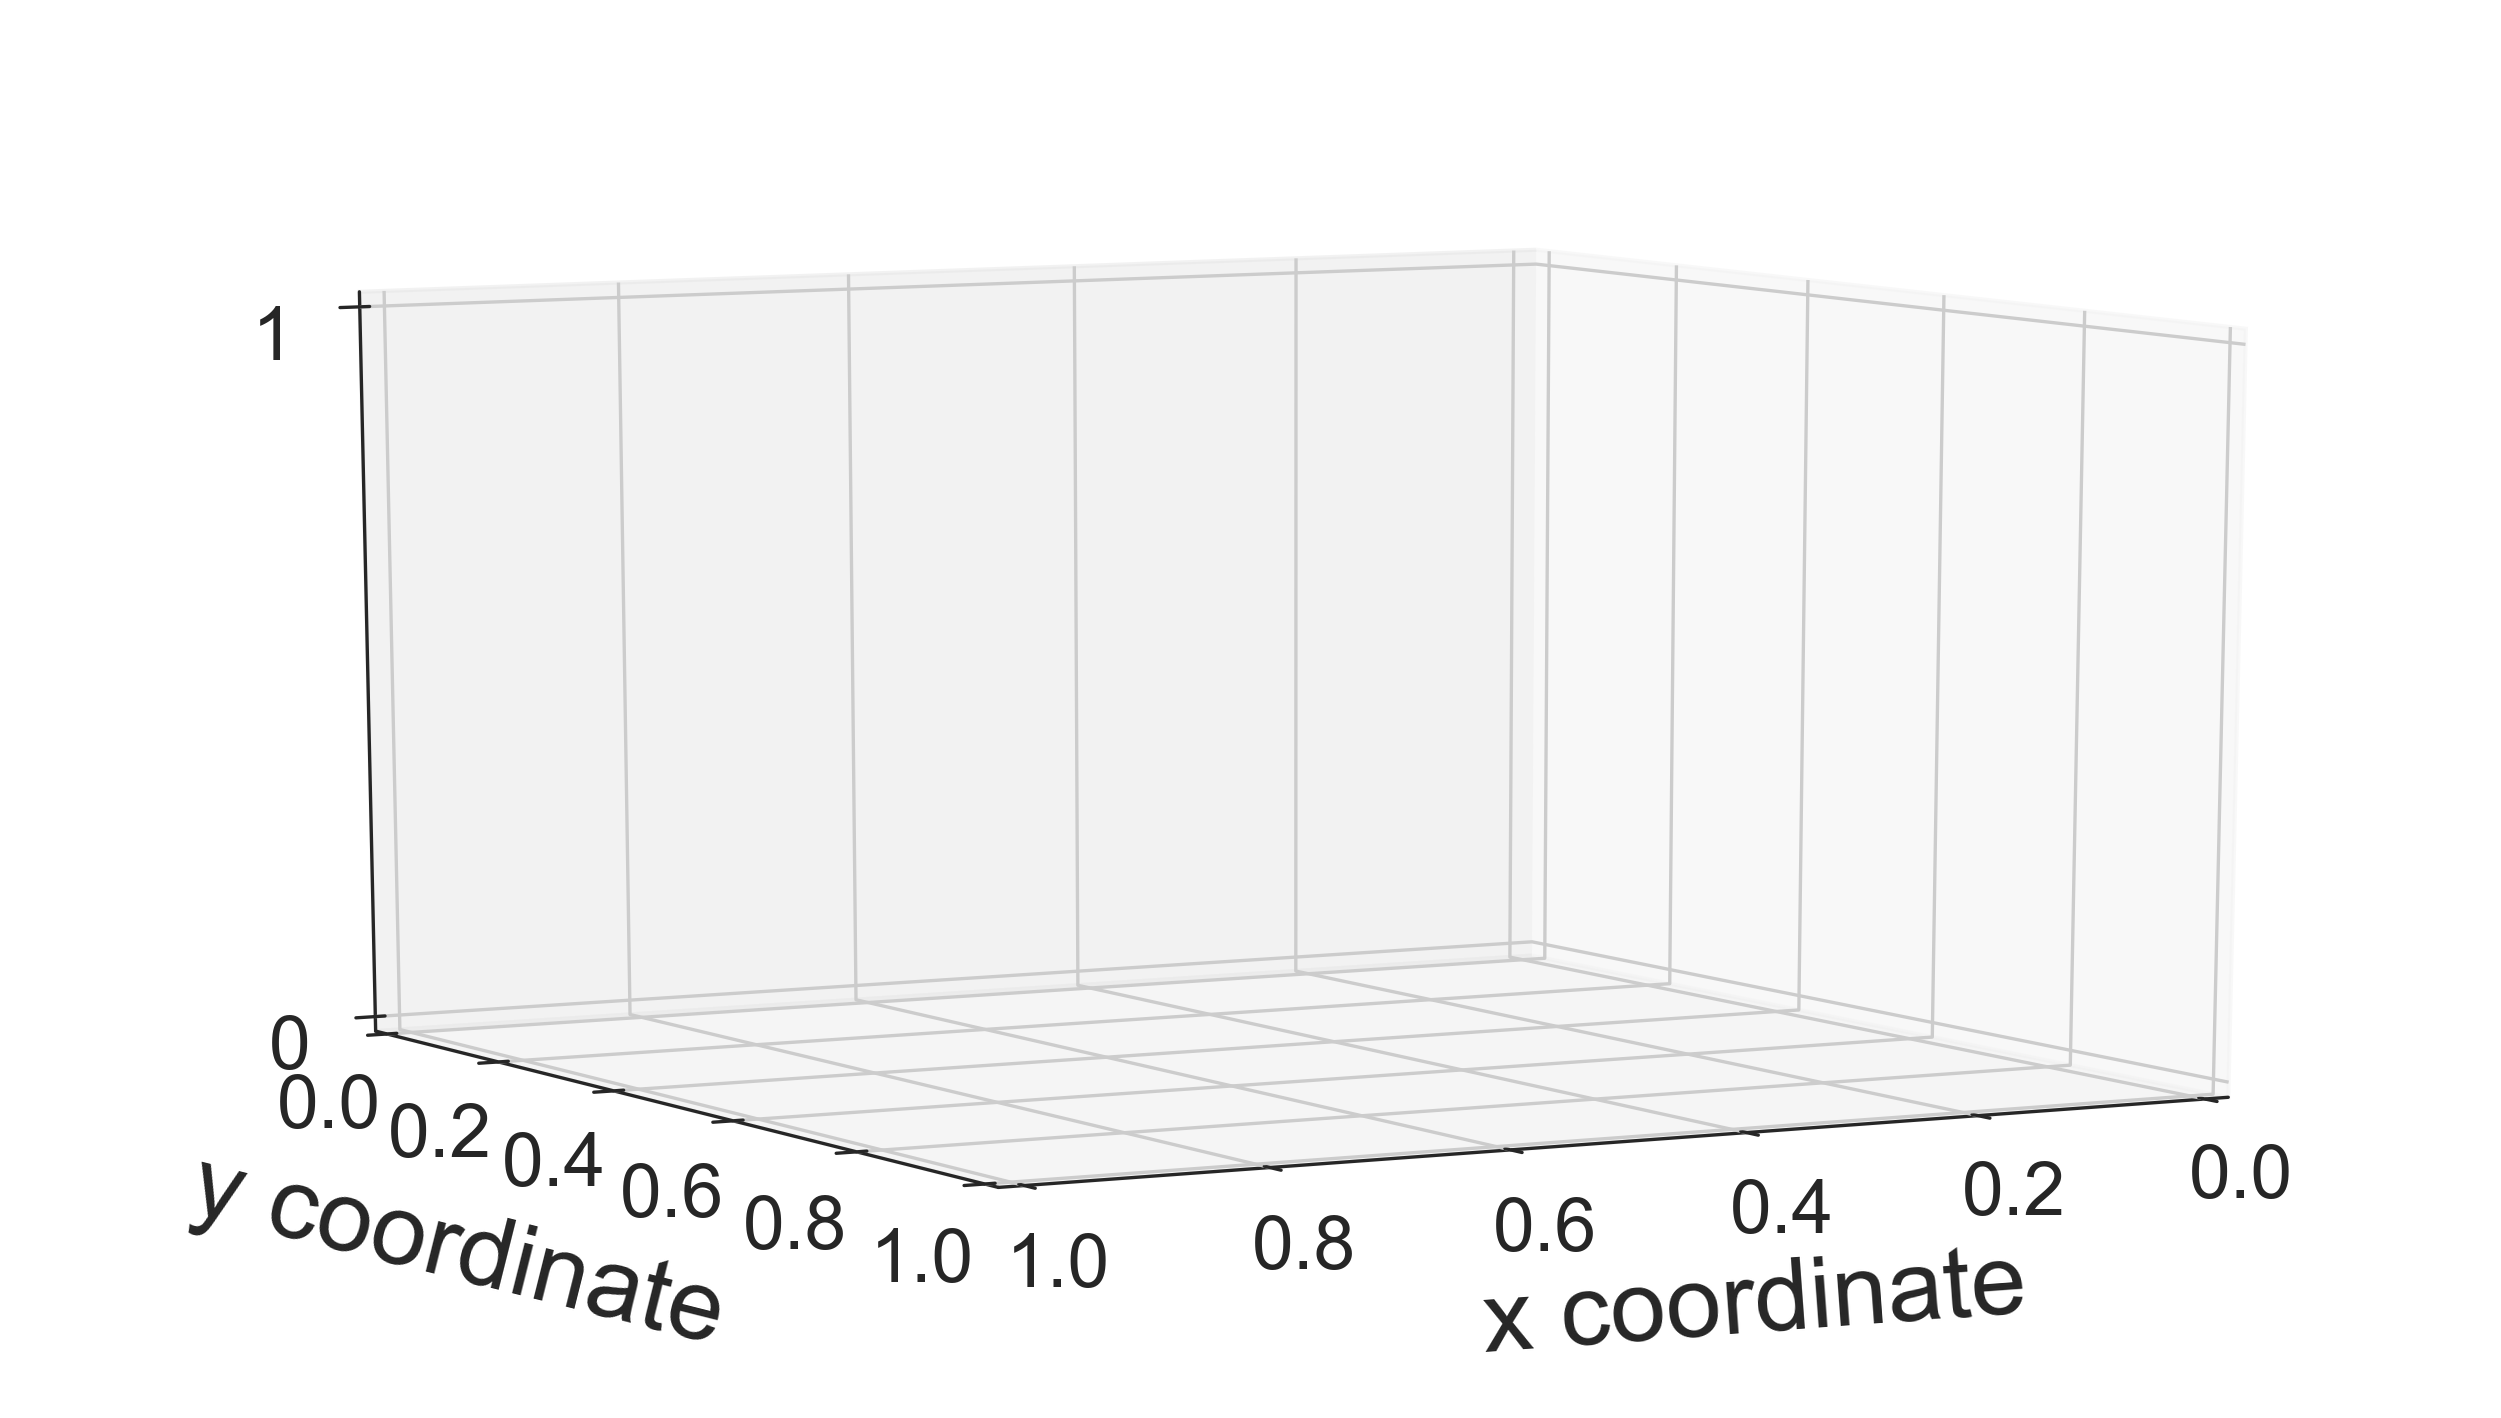

In [1336]:
def plot_surfaces(dlg, params, subj_id, trials, colors):
    dlp = dl_plotter.DLPlotter(elev=10, azim=61)
    for i, trial_no in enumerate(trials):
        x, y, dl = dlg.get_model_dl(params.loc[subj_id, trial_no][2:2+dlg.model.n_params])
        dlp.plot_surface(x, y, dl, color=colors[i], alpha=0.8) 
    dlp.add_legend(colors, trials)
    #plt.savefig('figures/trials_%i_dlv.pdf' % (subj_id))

def plot_trajectories(data, subj_id, trials, colors):
    tp = trajectory_plotter.TrajectoryPlotter()
    for i, trial_no in enumerate(trials):
#         print(trial_data)
        trial_data = data[(data.subj_id==subj_id) & (data.trial_no==trial_no)]
        tp.plot_trajectory(trial_data, color=colors[i], label=trial_no)
        print(trial_data.iloc[0][['block_cue', 'motion_time', 'max_d']])
    tp.add_legend()
    #plt.savefig('figures/trials_%i_traj.pdf' % (subj_id))

def compare_dlv(subj_id, trials, filename, processed_data):
    fit_params = pd.read_csv(filename, 
                             index_col=['subj_id', 'trial_no'], header=0)
    cmap = cm.viridis
    colors = [cmap(0.7), cmap(0.35), cmap(0.1)]
          
    model = dl_model_3.DLModel3()  
    dlg = dl_generator.DLGenerator(model) 
    plot_surfaces(dlg, fit_params, subj_id, trials, colors)
    
    dr = data_reader.DataReader()
    data = dr.get_processed_data(path=processed_data)
    plot_trajectories(data, subj_id, trials, colors)

filename = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/trajectory/fit_params_by_trial_method_9.csv'
processed_data = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/trajectory/processed_data_sub-02-10.csv'
subj_id = 9
trials = [1,2,3]
compare_dlv(subj_id=subj_id, trials=trials, filename=filename, processed_data=processed_data)


## plot block

param_cue_type    high_cue
motion_time           1.49
max_d            -0.242638
Name: 2958, dtype: object
param_cue_type      low_cue
motion_time            2.12
max_d             0.0334871
Name: 2805, dtype: object


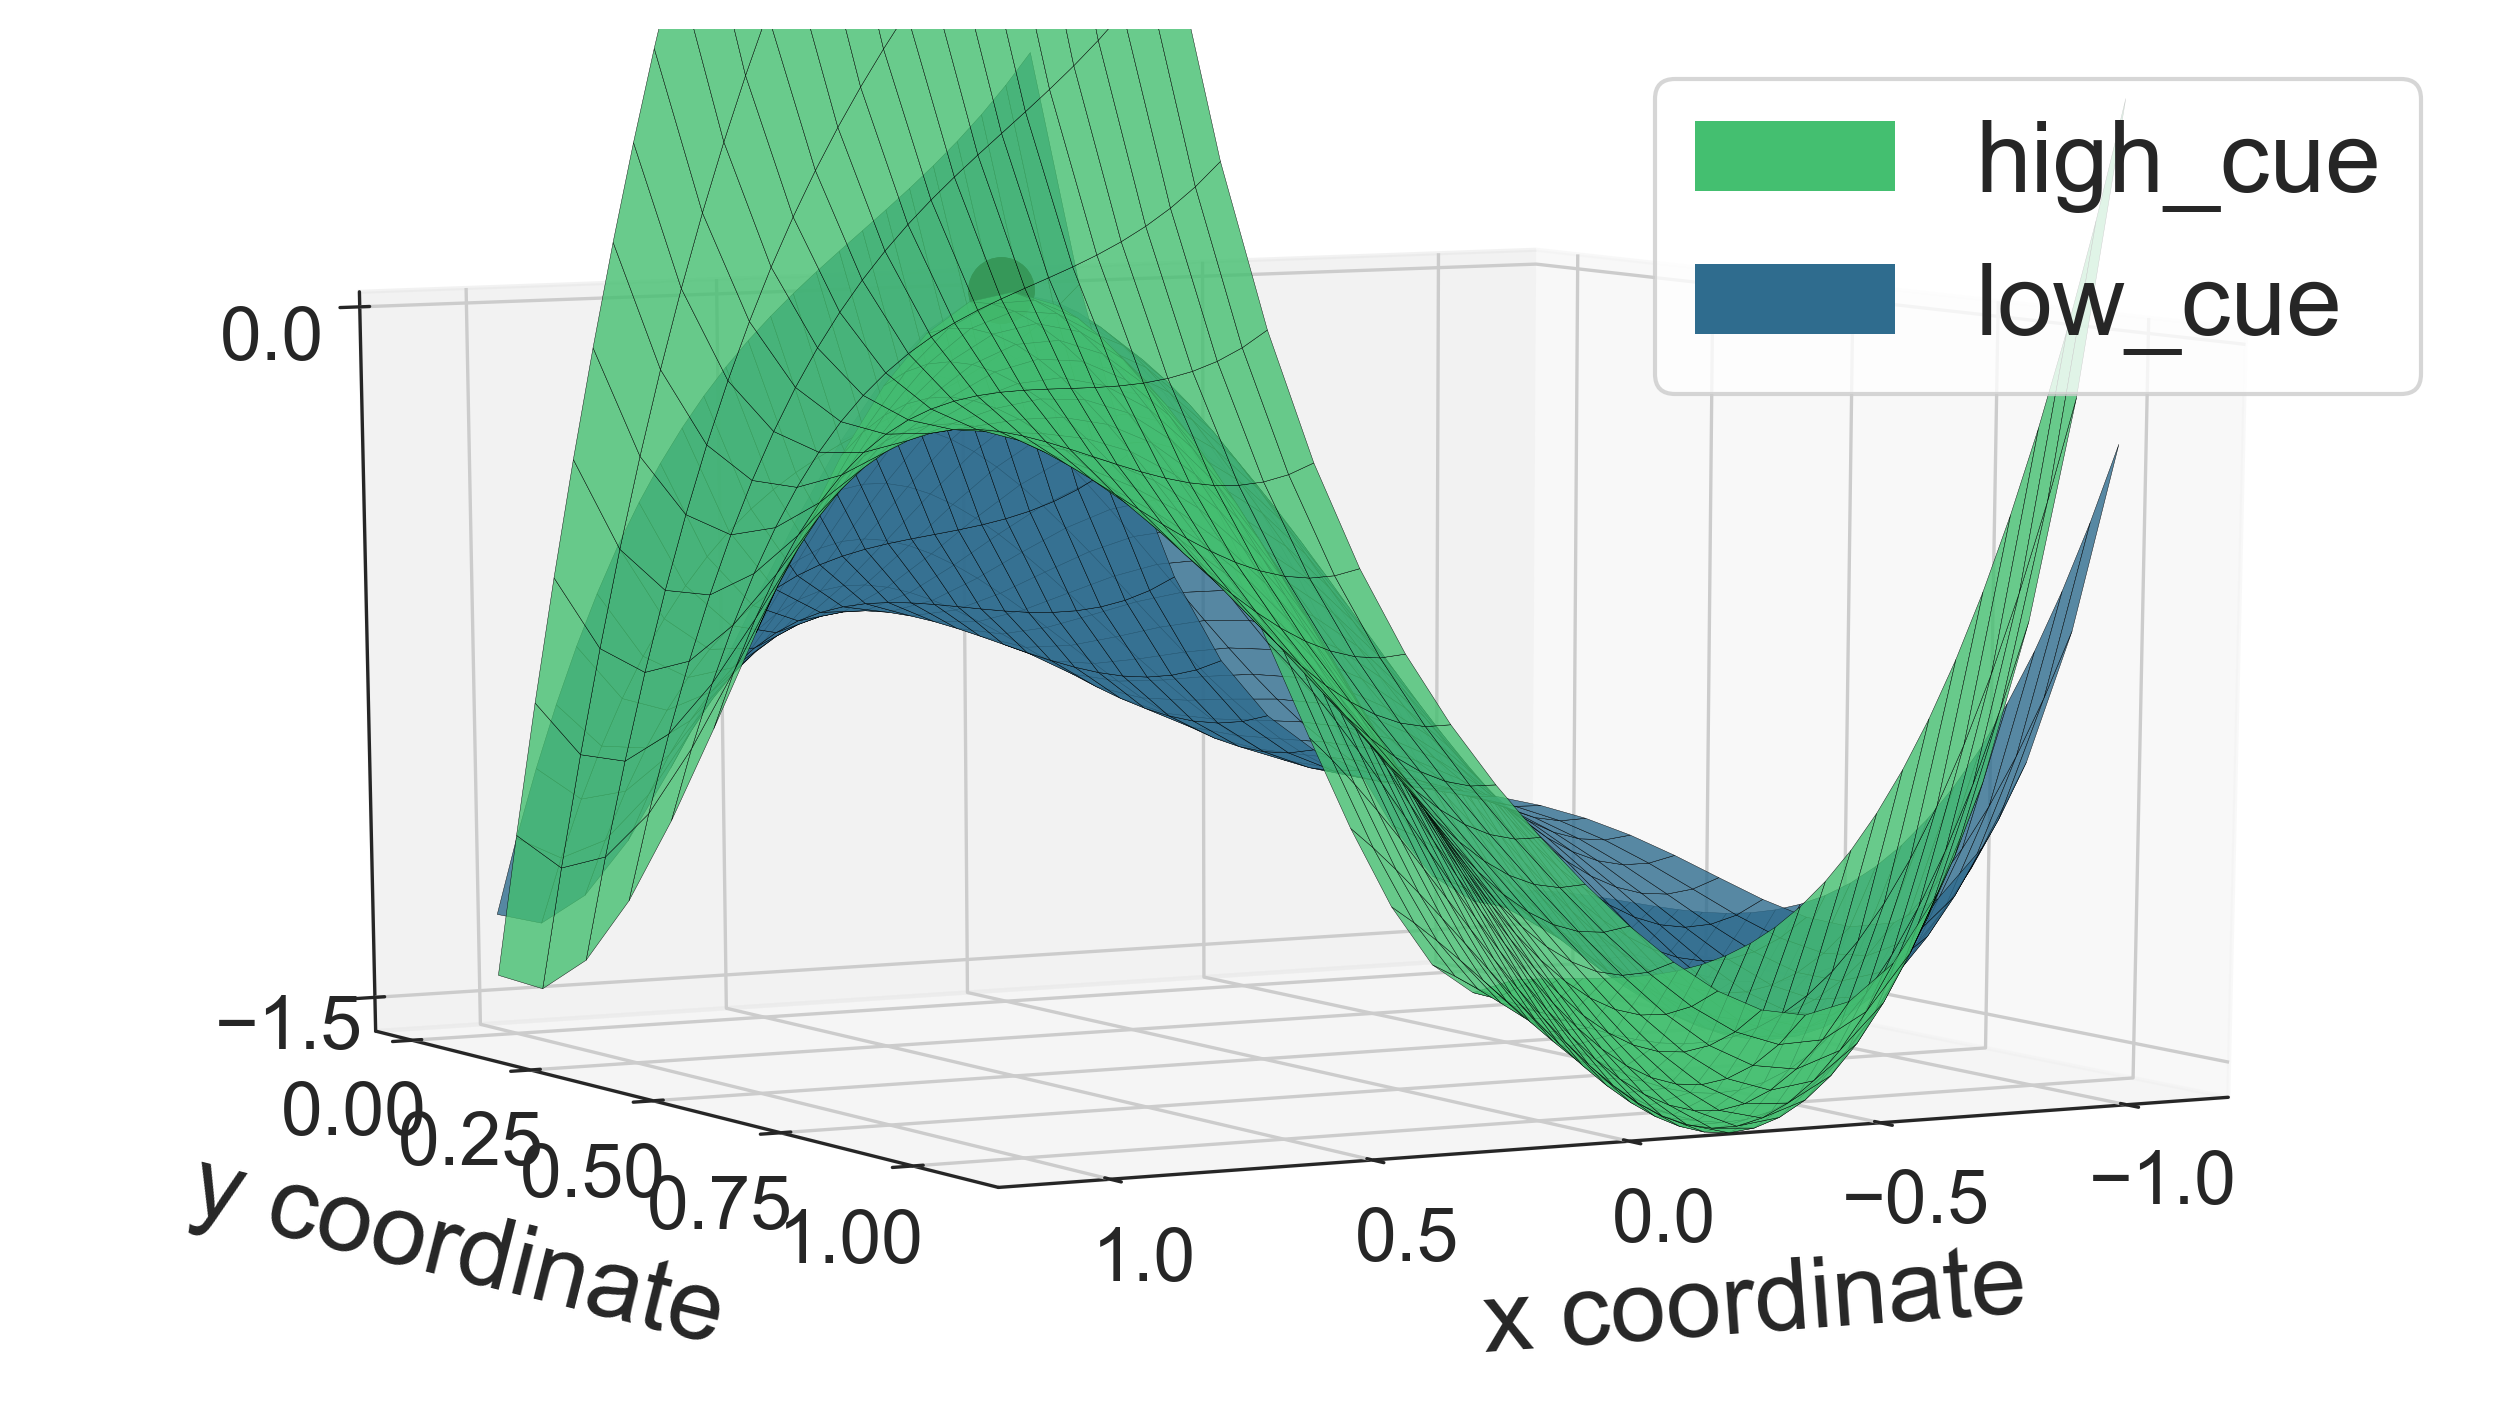

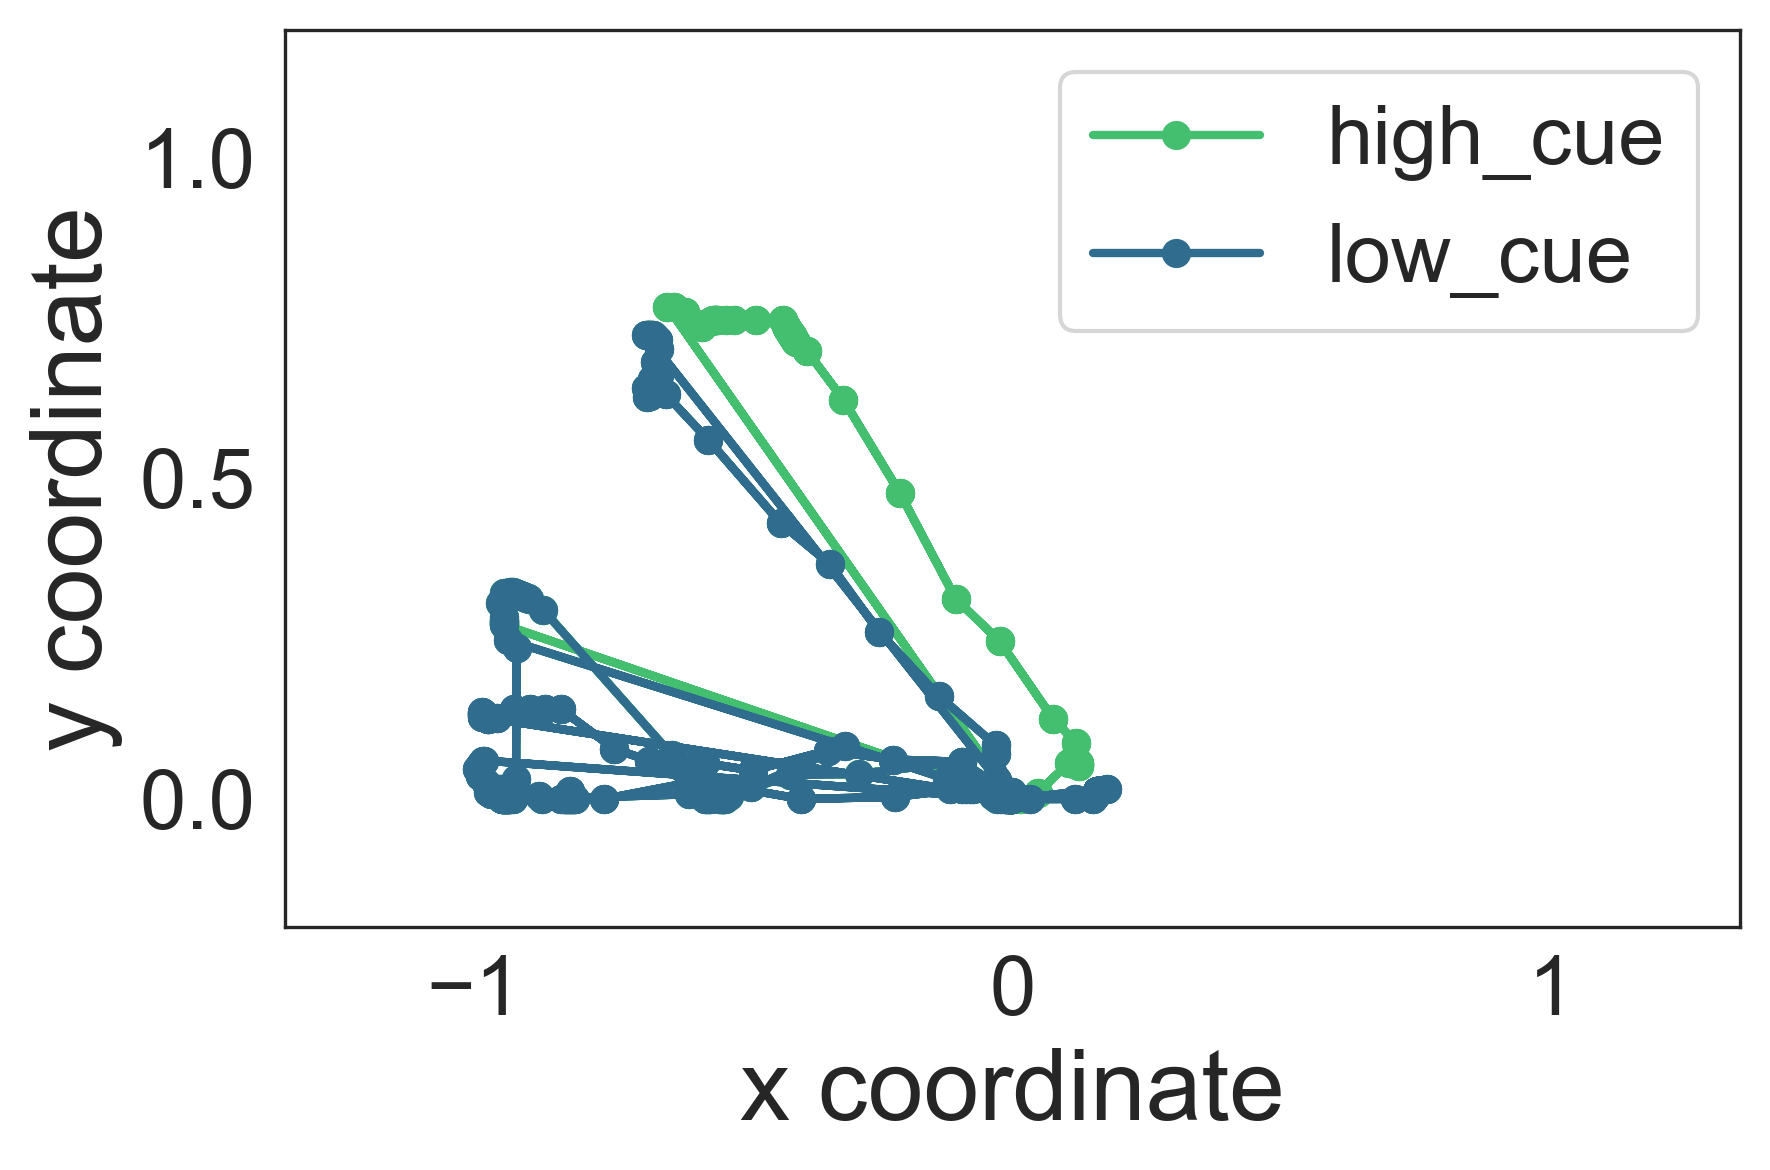

In [1335]:
def plot_surfaces(dlg, params, subj_id, trials, colors):
    dlp = dl_plotter.DLPlotter(elev=10, azim=61)
    for i, block_cue in enumerate(trials):
        x, y, dl = dlg.get_model_dl(params.loc[subj_id, block_cue][2:2+dlg.model.n_params])
        dlp.plot_surface(x, y, dl, color=colors[i], alpha=0.8) 
    dlp.add_legend(colors, trials)
    #plt.savefig('figures/trials_%i_dlv.pdf' % (subj_id))

def plot_trajectories(data, subj_id, trials, colors):
    tp = trajectory_plotter.TrajectoryPlotter()
    for i, block_cue in enumerate(trials):
#         print(trial_data)
        trial_data = data[(data.subj_id==subj_id) & (data.param_cue_type==block_cue)]
        tp.plot_trajectory(trial_data, color=colors[i], label=block_cue)
        print(trial_data.iloc[0][['param_cue_type', 'motion_time', 'max_d']])
    tp.add_legend()
    #plt.savefig('figures/trials_%i_traj.pdf' % (subj_id))

def compare_dlv(subj_id, trials, filename, processed_data):
    fit_params = pd.read_csv(filename, 
                             index_col=['subj_id', 'param_cue_type'], header=0)
    cmap = cm.viridis
    colors = [cmap(0.7), cmap(0.35), cmap(0.1)]
          
    model = dl_model_3.DLModel3()  
    dlg = dl_generator.DLGenerator(model) 
    plot_surfaces(dlg, fit_params, subj_id, trials, colors)
    
    dr = data_reader.DataReader()
    data = dr.get_processed_data(path=processed_data)
    plot_trajectories(data, subj_id, trials, colors)

filename = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/trajectory/fit_params_by_block_method_9.csv'
processed_data = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/trajectory/processed_data_sub-02-10.csv'
subj_id = 3
block = ["high_cue","low_cue"]
compare_dlv(subj_id=subj_id, trials=block, filename=filename, processed_data=processed_data)


# actual judgment